In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, feature_selection, metrics, ensemble, linear_model, tree
import scipy
import plotly
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLS
warnings.filterwarnings('ignore')

In [186]:
train=pd.read_csv('train_benz_manufacturing.csv')
test=pd.read_csv('test_benz_manufacturing.csv')

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [188]:
def isnull(df, features):
    for features in features:
        if features not in 'ID' and df[features].isnull().sum()>1:
            print(features)
            print(len(features))

    print("There is no null values")

In [189]:
isnull(train, train.columns)

There is no null values


In [190]:
isnull(test, test.columns)

There is no null values


In [191]:
def numVCplot(plot, df, features):
    for features in features:
        if df[features].dtype!='O' and features not in 'ID':
            print(features)
            vc=df[features].value_counts()
            print(f'features {features} has value counts:\n {vc}')
            if df[features].nunique()<10:
                print(f'feature with low counts:{features}')
                print(f'length of features:{df[features].nunique()}')
                x=df[features].unique()
                h=df[features].value_counts()
                plot(x,h)
                plt.xlabel(features)
                plt.show()
            

y
features y has value counts:
 90.76     7
89.06     7
89.38     7
91.88     7
93.62     6
         ..
93.26     1
93.24     1
105.94    1
94.17     1
79.00     1
Name: y, Length: 2545, dtype: int64
X10
features X10 has value counts:
 0    4153
1      56
Name: X10, dtype: int64
feature with low counts:X10
length of features:2


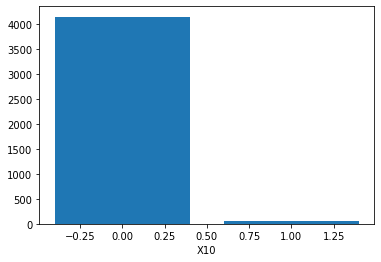

X11
features X11 has value counts:
 0    4209
Name: X11, dtype: int64
feature with low counts:X11
length of features:1


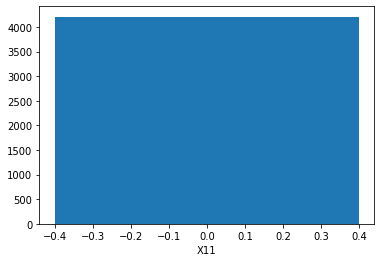

X12
features X12 has value counts:
 0    3893
1     316
Name: X12, dtype: int64
feature with low counts:X12
length of features:2


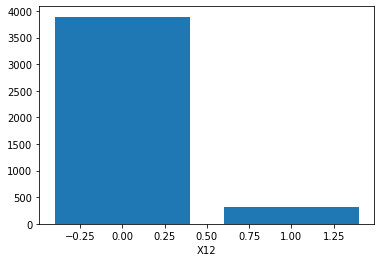

X13
features X13 has value counts:
 0    3965
1     244
Name: X13, dtype: int64
feature with low counts:X13
length of features:2


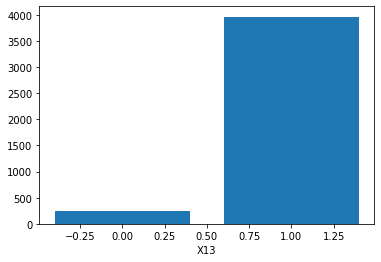

X14
features X14 has value counts:
 0    2407
1    1802
Name: X14, dtype: int64
feature with low counts:X14
length of features:2


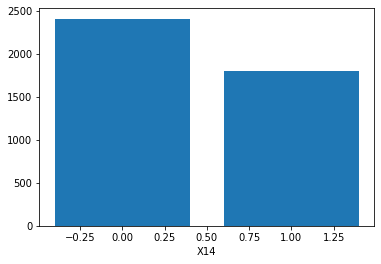

X15
features X15 has value counts:
 0    4207
1       2
Name: X15, dtype: int64
feature with low counts:X15
length of features:2


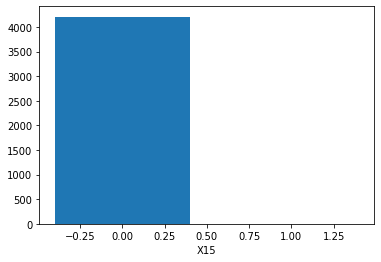

X16
features X16 has value counts:
 0    4198
1      11
Name: X16, dtype: int64
feature with low counts:X16
length of features:2


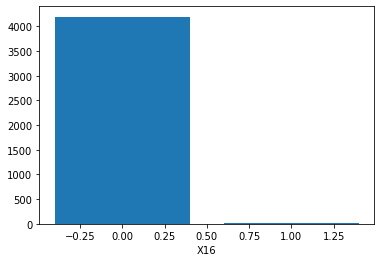

X17
features X17 has value counts:
 0    4177
1      32
Name: X17, dtype: int64
feature with low counts:X17
length of features:2


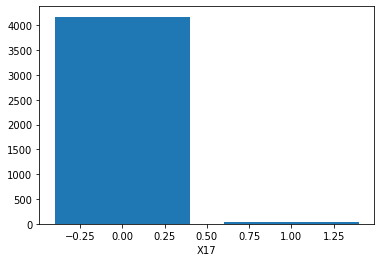

X18
features X18 has value counts:
 0    4176
1      33
Name: X18, dtype: int64
feature with low counts:X18
length of features:2


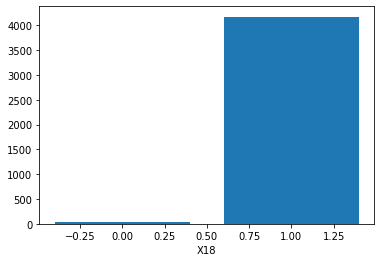

X19
features X19 has value counts:
 0    3790
1     419
Name: X19, dtype: int64
feature with low counts:X19
length of features:2


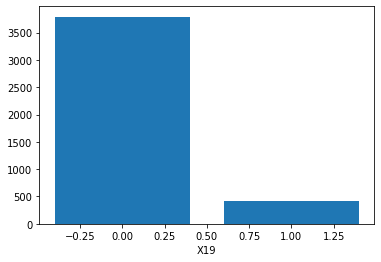

X20
features X20 has value counts:
 0    3608
1     601
Name: X20, dtype: int64
feature with low counts:X20
length of features:2


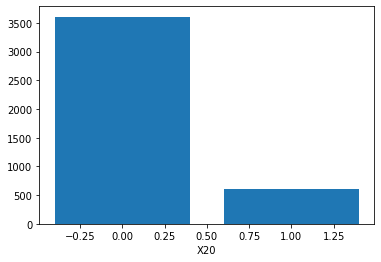

X21
features X21 has value counts:
 0    4198
1      11
Name: X21, dtype: int64
feature with low counts:X21
length of features:2


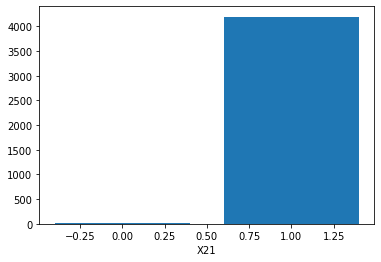

X22
features X22 has value counts:
 0    3843
1     366
Name: X22, dtype: int64
feature with low counts:X22
length of features:2


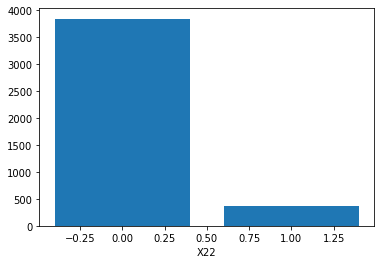

X23
features X23 has value counts:
 0    4122
1      87
Name: X23, dtype: int64
feature with low counts:X23
length of features:2


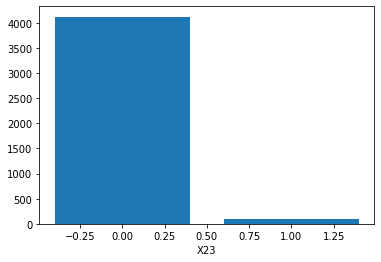

X24
features X24 has value counts:
 0    4201
1       8
Name: X24, dtype: int64
feature with low counts:X24
length of features:2


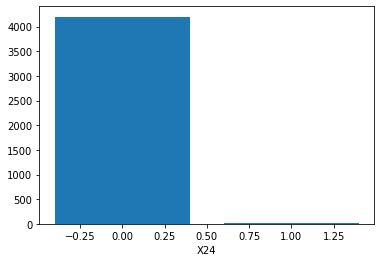

X26
features X26 has value counts:
 0    4188
1      21
Name: X26, dtype: int64
feature with low counts:X26
length of features:2


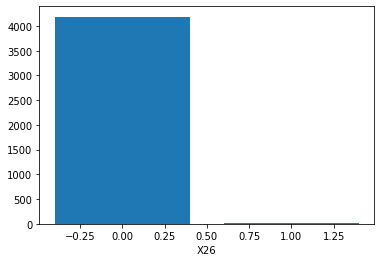

X27
features X27 has value counts:
 1    2873
0    1336
Name: X27, dtype: int64
feature with low counts:X27
length of features:2


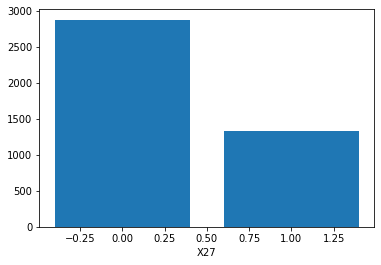

X28
features X28 has value counts:
 0    4072
1     137
Name: X28, dtype: int64
feature with low counts:X28
length of features:2


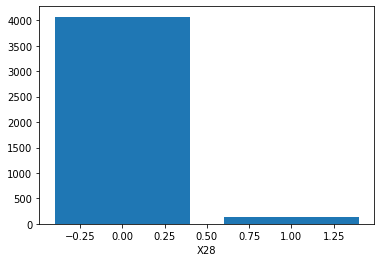

X29
features X29 has value counts:
 0    4028
1     181
Name: X29, dtype: int64
feature with low counts:X29
length of features:2


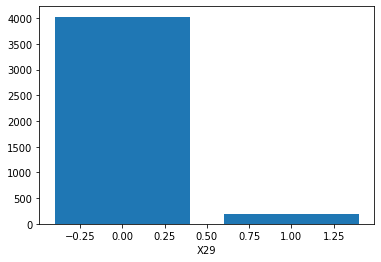

X30
features X30 has value counts:
 0    4190
1      19
Name: X30, dtype: int64
feature with low counts:X30
length of features:2


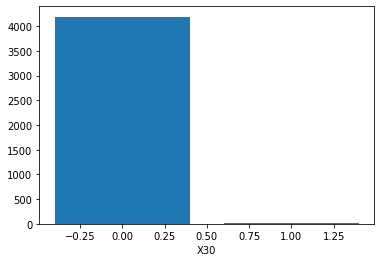

X31
features X31 has value counts:
 0    3231
1     978
Name: X31, dtype: int64
feature with low counts:X31
length of features:2


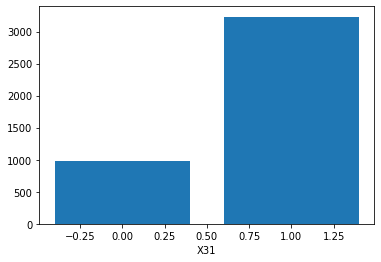

X32
features X32 has value counts:
 0    4162
1      47
Name: X32, dtype: int64
feature with low counts:X32
length of features:2


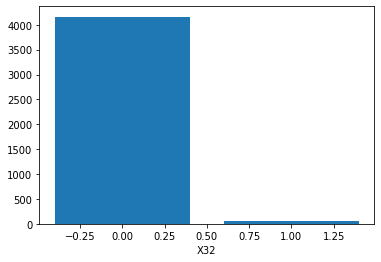

X33
features X33 has value counts:
 0    4208
1       1
Name: X33, dtype: int64
feature with low counts:X33
length of features:2


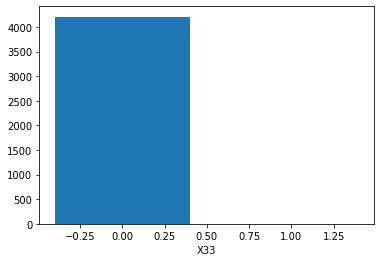

X34
features X34 has value counts:
 0    4186
1      23
Name: X34, dtype: int64
feature with low counts:X34
length of features:2


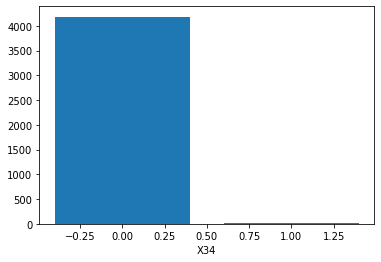

X35
features X35 has value counts:
 0    3231
1     978
Name: X35, dtype: int64
feature with low counts:X35
length of features:2


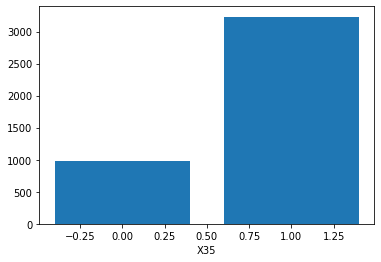

X36
features X36 has value counts:
 0    4190
1      19
Name: X36, dtype: int64
feature with low counts:X36
length of features:2


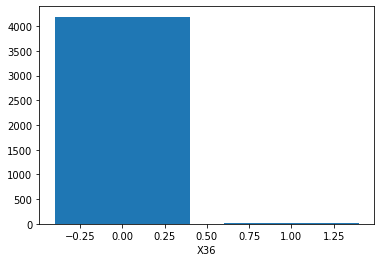

X37
features X37 has value counts:
 0    3231
1     978
Name: X37, dtype: int64
feature with low counts:X37
length of features:2


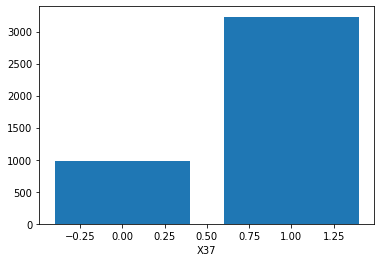

X38
features X38 has value counts:
 0    4069
1     140
Name: X38, dtype: int64
feature with low counts:X38
length of features:2


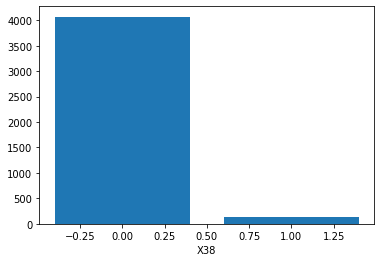

X39
features X39 has value counts:
 0    4208
1       1
Name: X39, dtype: int64
feature with low counts:X39
length of features:2


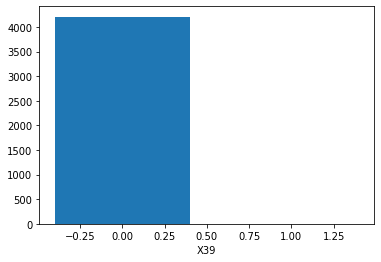

X40
features X40 has value counts:
 0    4206
1       3
Name: X40, dtype: int64
feature with low counts:X40
length of features:2


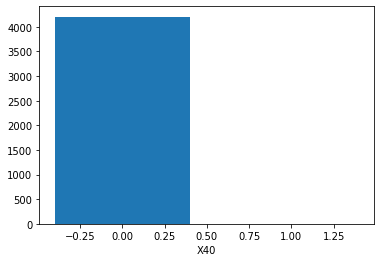

X41
features X41 has value counts:
 0    4161
1      48
Name: X41, dtype: int64
feature with low counts:X41
length of features:2


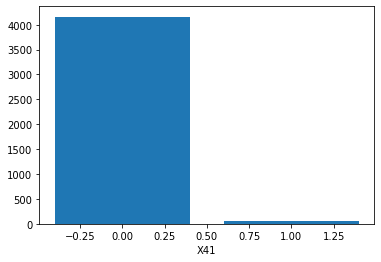

X42
features X42 has value counts:
 0    4208
1       1
Name: X42, dtype: int64
feature with low counts:X42
length of features:2


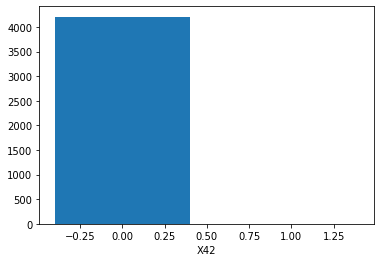

X43
features X43 has value counts:
 0    3905
1     304
Name: X43, dtype: int64
feature with low counts:X43
length of features:2


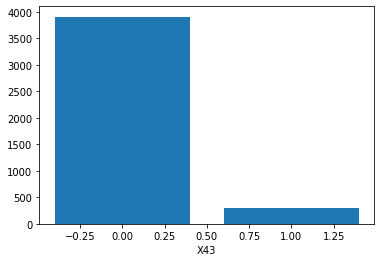

X44
features X44 has value counts:
 0    4161
1      48
Name: X44, dtype: int64
feature with low counts:X44
length of features:2


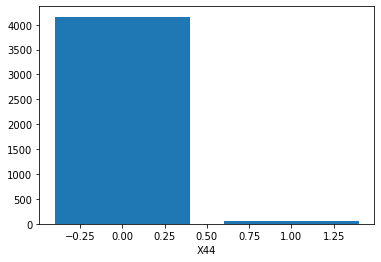

X45
features X45 has value counts:
 0    3143
1    1066
Name: X45, dtype: int64
feature with low counts:X45
length of features:2


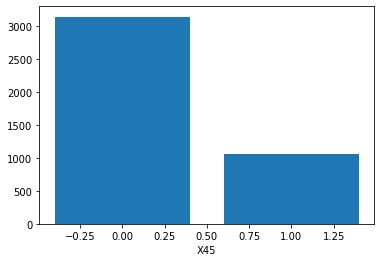

X46
features X46 has value counts:
 1    2514
0    1695
Name: X46, dtype: int64
feature with low counts:X46
length of features:2


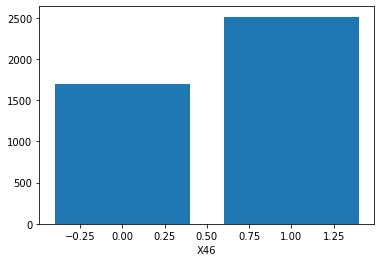

X47
features X47 has value counts:
 0    4155
1      54
Name: X47, dtype: int64
feature with low counts:X47
length of features:2


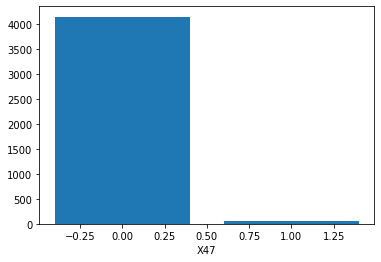

X48
features X48 has value counts:
 0    4115
1      94
Name: X48, dtype: int64
feature with low counts:X48
length of features:2


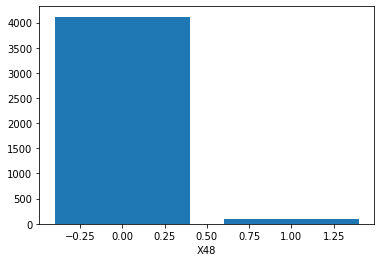

X49
features X49 has value counts:
 0    3695
1     514
Name: X49, dtype: int64
feature with low counts:X49
length of features:2


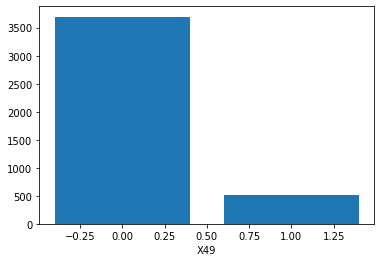

X50
features X50 has value counts:
 0    3308
1     901
Name: X50, dtype: int64
feature with low counts:X50
length of features:2


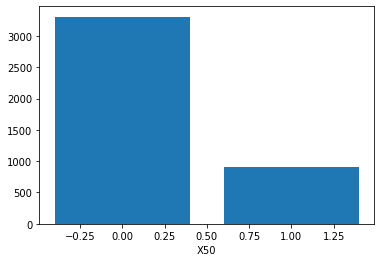

X51
features X51 has value counts:
 1    3038
0    1171
Name: X51, dtype: int64
feature with low counts:X51
length of features:2


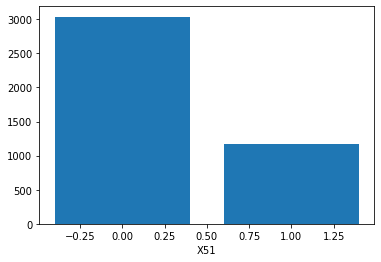

X52
features X52 has value counts:
 0    4031
1     178
Name: X52, dtype: int64
feature with low counts:X52
length of features:2


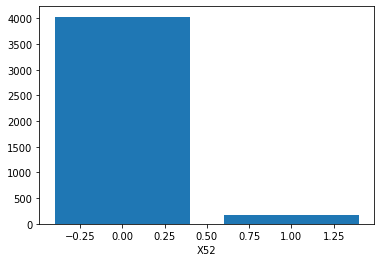

X53
features X53 has value counts:
 0    4180
1      29
Name: X53, dtype: int64
feature with low counts:X53
length of features:2


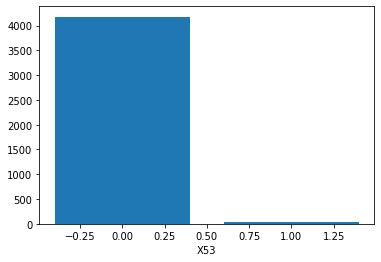

X54
features X54 has value counts:
 0    4026
1     183
Name: X54, dtype: int64
feature with low counts:X54
length of features:2


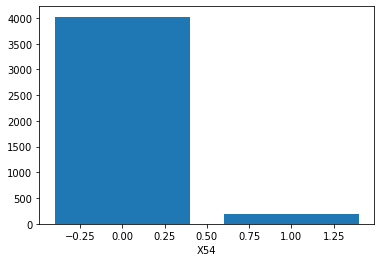

X55
features X55 has value counts:
 0    4187
1      22
Name: X55, dtype: int64
feature with low counts:X55
length of features:2


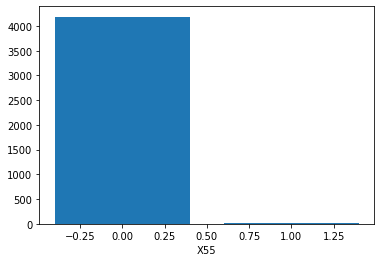

X56
features X56 has value counts:
 0    4120
1      89
Name: X56, dtype: int64
feature with low counts:X56
length of features:2


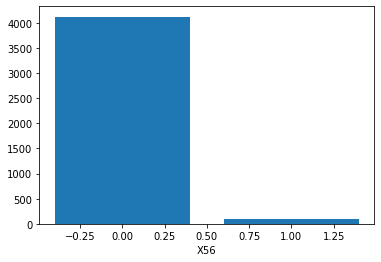

X57
features X57 has value counts:
 0    4153
1      56
Name: X57, dtype: int64
feature with low counts:X57
length of features:2


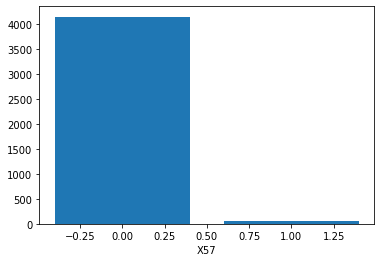

X58
features X58 has value counts:
 1    2420
0    1789
Name: X58, dtype: int64
feature with low counts:X58
length of features:2


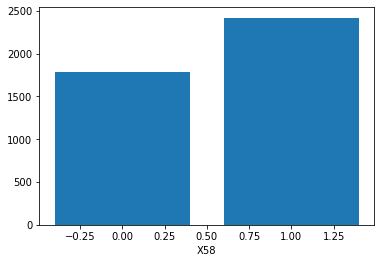

X59
features X59 has value counts:
 0    4206
1       3
Name: X59, dtype: int64
feature with low counts:X59
length of features:2


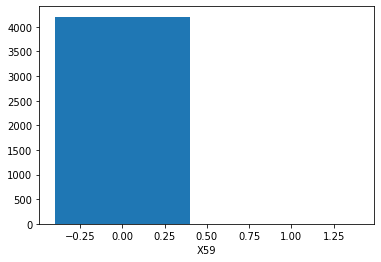

X60
features X60 has value counts:
 0    4203
1       6
Name: X60, dtype: int64
feature with low counts:X60
length of features:2


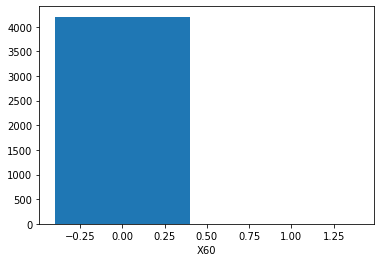

X61
features X61 has value counts:
 1    4015
0     194
Name: X61, dtype: int64
feature with low counts:X61
length of features:2


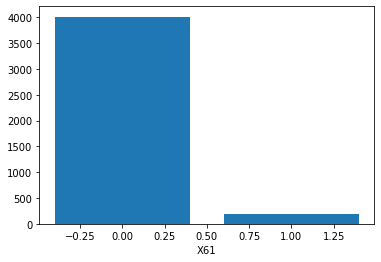

X62
features X62 has value counts:
 0    4184
1      25
Name: X62, dtype: int64
feature with low counts:X62
length of features:2


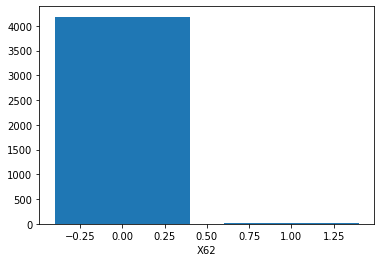

X63
features X63 has value counts:
 0    4161
1      48
Name: X63, dtype: int64
feature with low counts:X63
length of features:2


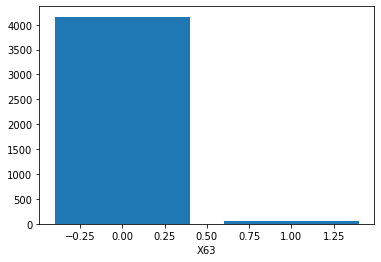

X64
features X64 has value counts:
 0    2630
1    1579
Name: X64, dtype: int64
feature with low counts:X64
length of features:2


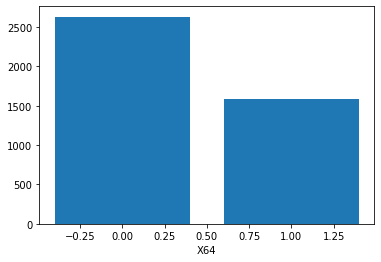

X65
features X65 has value counts:
 0    4200
1       9
Name: X65, dtype: int64
feature with low counts:X65
length of features:2


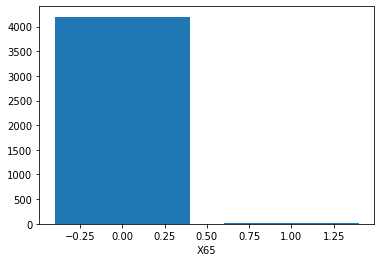

X66
features X66 has value counts:
 0    4095
1     114
Name: X66, dtype: int64
feature with low counts:X66
length of features:2


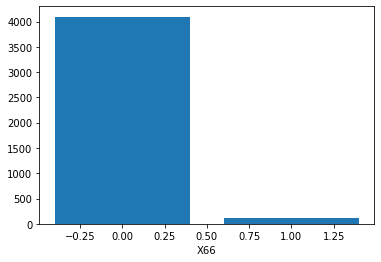

X67
features X67 has value counts:
 0    4201
1       8
Name: X67, dtype: int64
feature with low counts:X67
length of features:2


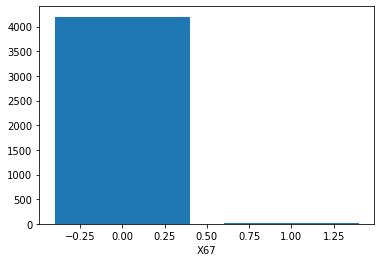

X68
features X68 has value counts:
 0    3900
1     309
Name: X68, dtype: int64
feature with low counts:X68
length of features:2


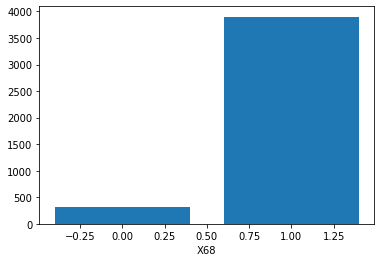

X69
features X69 has value counts:
 0    4083
1     126
Name: X69, dtype: int64
feature with low counts:X69
length of features:2


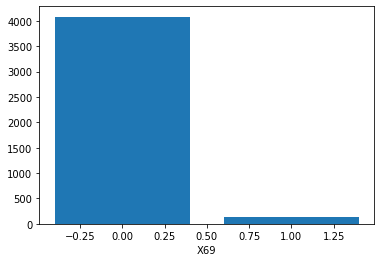

X70
features X70 has value counts:
 1    3872
0     337
Name: X70, dtype: int64
feature with low counts:X70
length of features:2


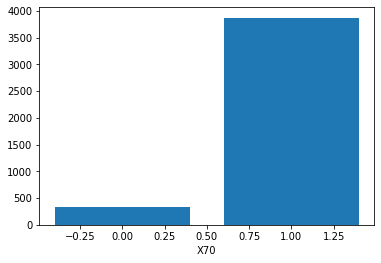

X71
features X71 has value counts:
 0    3773
1     436
Name: X71, dtype: int64
feature with low counts:X71
length of features:2


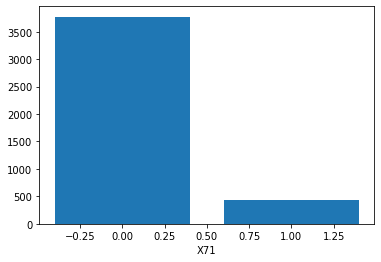

X73
features X73 has value counts:
 0    4125
1      84
Name: X73, dtype: int64
feature with low counts:X73
length of features:2


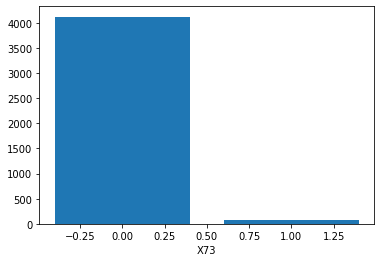

X74
features X74 has value counts:
 1    4206
0       3
Name: X74, dtype: int64
feature with low counts:X74
length of features:2


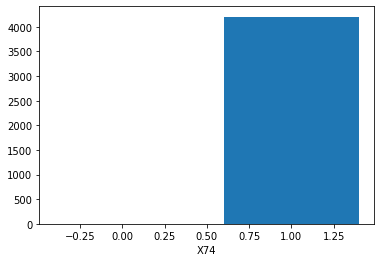

X75
features X75 has value counts:
 0    4057
1     152
Name: X75, dtype: int64
feature with low counts:X75
length of features:2


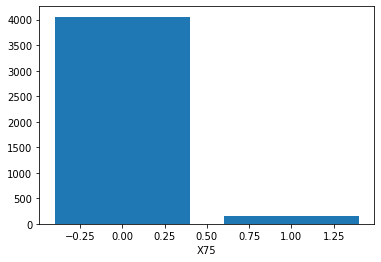

X76
features X76 has value counts:
 0    4026
1     183
Name: X76, dtype: int64
feature with low counts:X76
length of features:2


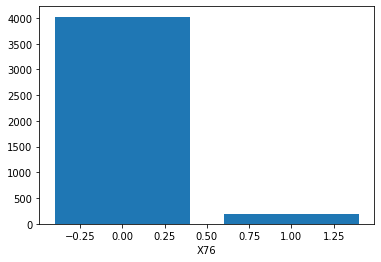

X77
features X77 has value counts:
 0    4156
1      53
Name: X77, dtype: int64
feature with low counts:X77
length of features:2


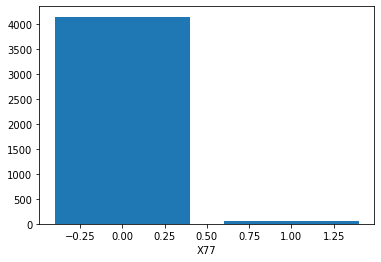

X78
features X78 has value counts:
 0    4185
1      24
Name: X78, dtype: int64
feature with low counts:X78
length of features:2


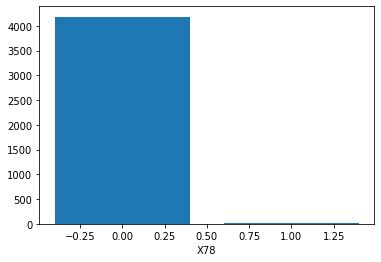

X79
features X79 has value counts:
 0    4103
1     106
Name: X79, dtype: int64
feature with low counts:X79
length of features:2


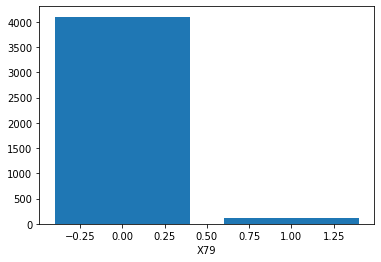

X80
features X80 has value counts:
 1    3986
0     223
Name: X80, dtype: int64
feature with low counts:X80
length of features:2


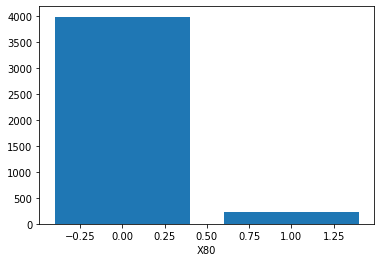

X81
features X81 has value counts:
 0    3245
1     964
Name: X81, dtype: int64
feature with low counts:X81
length of features:2


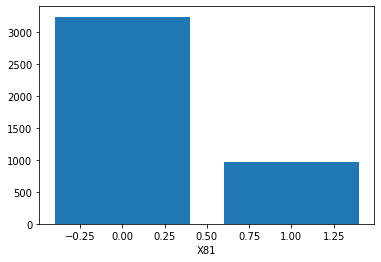

X82
features X82 has value counts:
 0    4137
1      72
Name: X82, dtype: int64
feature with low counts:X82
length of features:2


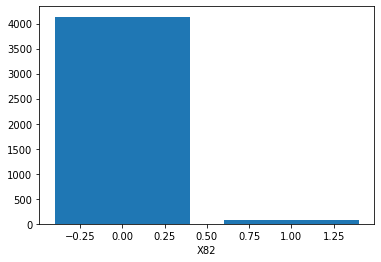

X83
features X83 has value counts:
 0    4204
1       5
Name: X83, dtype: int64
feature with low counts:X83
length of features:2


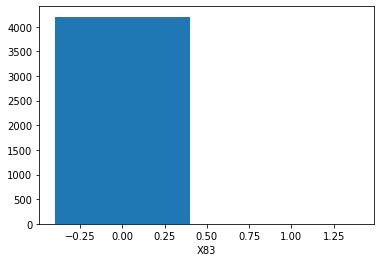

X84
features X84 has value counts:
 0    3773
1     436
Name: X84, dtype: int64
feature with low counts:X84
length of features:2


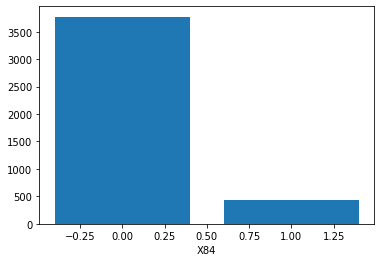

X85
features X85 has value counts:
 0    2491
1    1718
Name: X85, dtype: int64
feature with low counts:X85
length of features:2


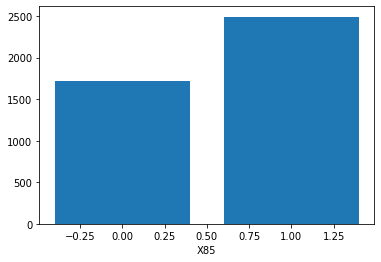

X86
features X86 has value counts:
 0    4203
1       6
Name: X86, dtype: int64
feature with low counts:X86
length of features:2


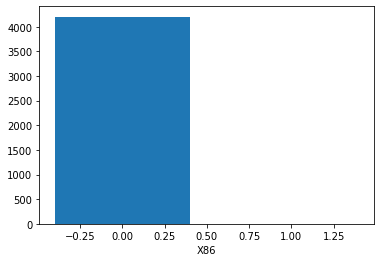

X87
features X87 has value counts:
 0    4205
1       4
Name: X87, dtype: int64
feature with low counts:X87
length of features:2


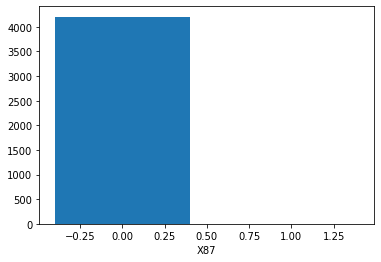

X88
features X88 has value counts:
 0    4179
1      30
Name: X88, dtype: int64
feature with low counts:X88
length of features:2


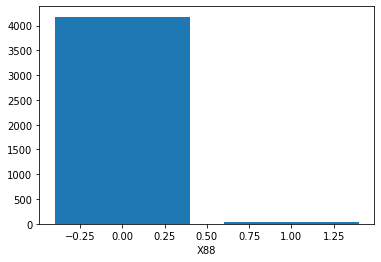

X89
features X89 has value counts:
 0    4206
1       3
Name: X89, dtype: int64
feature with low counts:X89
length of features:2


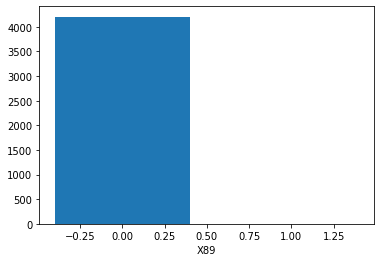

X90
features X90 has value counts:
 0    4178
1      31
Name: X90, dtype: int64
feature with low counts:X90
length of features:2


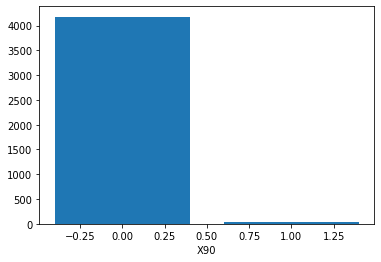

X91
features X91 has value counts:
 0    4202
1       7
Name: X91, dtype: int64
feature with low counts:X91
length of features:2


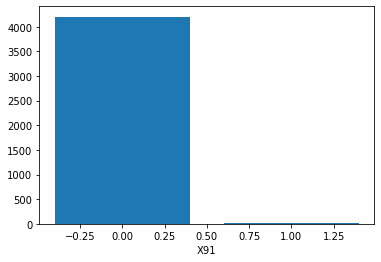

X92
features X92 has value counts:
 0    4205
1       4
Name: X92, dtype: int64
feature with low counts:X92
length of features:2


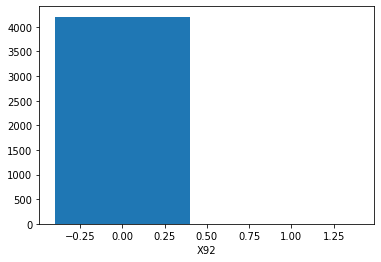

X93
features X93 has value counts:
 0    4209
Name: X93, dtype: int64
feature with low counts:X93
length of features:1


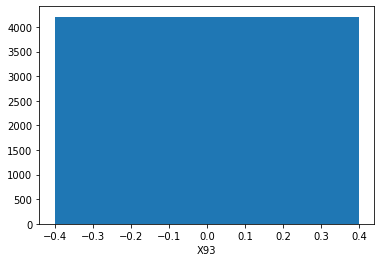

X94
features X94 has value counts:
 0    4178
1      31
Name: X94, dtype: int64
feature with low counts:X94
length of features:2


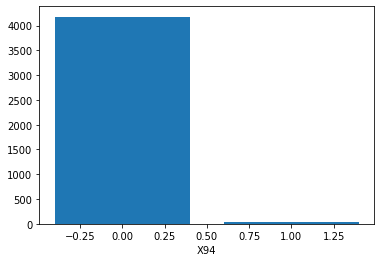

X95
features X95 has value counts:
 0    4208
1       1
Name: X95, dtype: int64
feature with low counts:X95
length of features:2


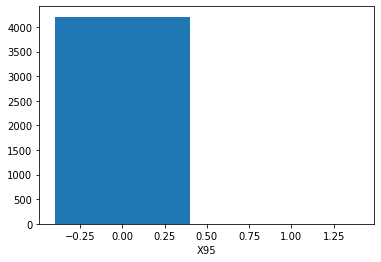

X96
features X96 has value counts:
 1    3191
0    1018
Name: X96, dtype: int64
feature with low counts:X96
length of features:2


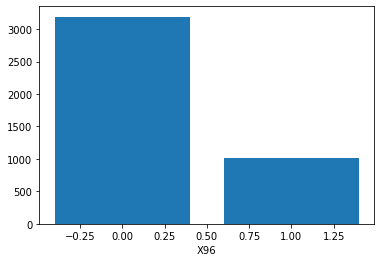

X97
features X97 has value counts:
 0    4191
1      18
Name: X97, dtype: int64
feature with low counts:X97
length of features:2


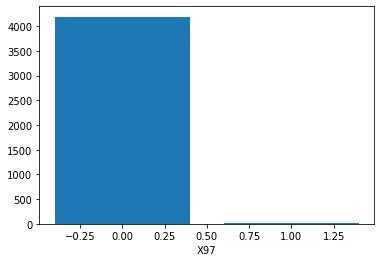

X98
features X98 has value counts:
 1    3967
0     242
Name: X98, dtype: int64
feature with low counts:X98
length of features:2


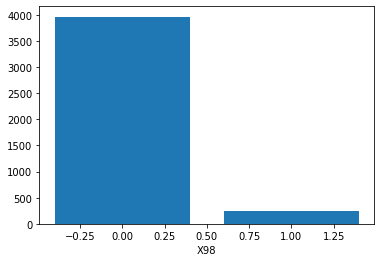

X99
features X99 has value counts:
 0    4173
1      36
Name: X99, dtype: int64
feature with low counts:X99
length of features:2


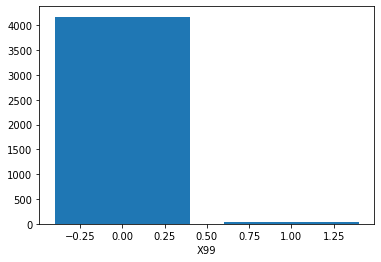

X100
features X100 has value counts:
 1    2905
0    1304
Name: X100, dtype: int64
feature with low counts:X100
length of features:2


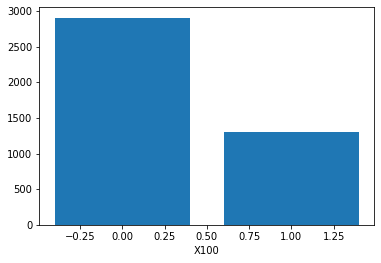

X101
features X101 has value counts:
 1    3938
0     271
Name: X101, dtype: int64
feature with low counts:X101
length of features:2


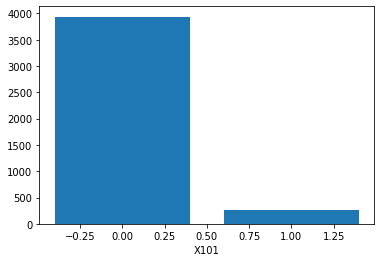

X102
features X102 has value counts:
 0    4180
1      29
Name: X102, dtype: int64
feature with low counts:X102
length of features:2


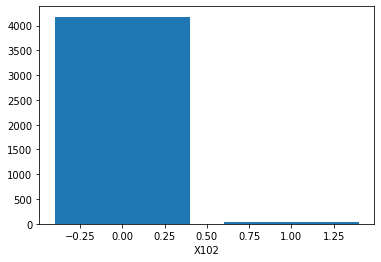

X103
features X103 has value counts:
 1    3302
0     907
Name: X103, dtype: int64
feature with low counts:X103
length of features:2


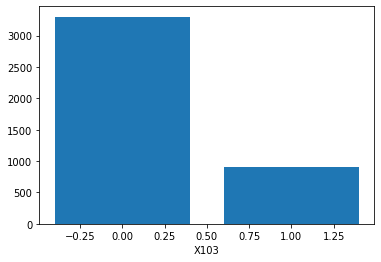

X104
features X104 has value counts:
 0    4201
1       8
Name: X104, dtype: int64
feature with low counts:X104
length of features:2


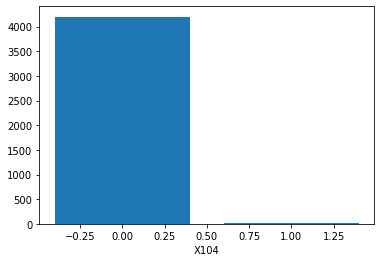

X105
features X105 has value counts:
 0    4199
1      10
Name: X105, dtype: int64
feature with low counts:X105
length of features:2


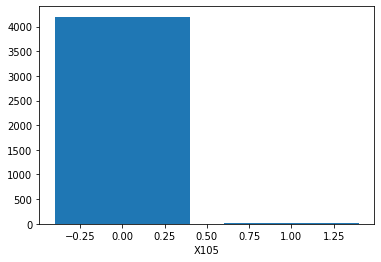

X106
features X106 has value counts:
 0    4154
1      55
Name: X106, dtype: int64
feature with low counts:X106
length of features:2


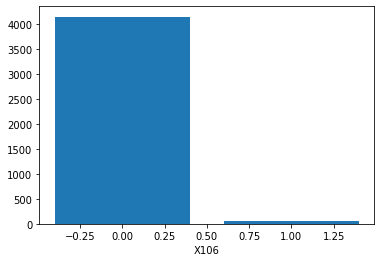

X107
features X107 has value counts:
 0    4209
Name: X107, dtype: int64
feature with low counts:X107
length of features:1


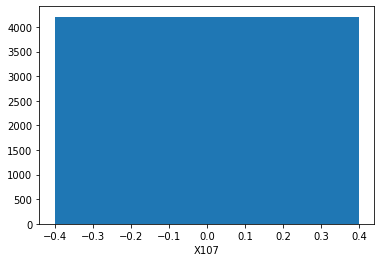

X108
features X108 has value counts:
 0    4147
1      62
Name: X108, dtype: int64
feature with low counts:X108
length of features:2


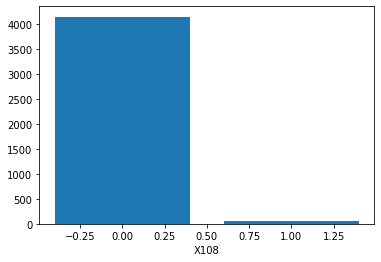

X109
features X109 has value counts:
 0    4039
1     170
Name: X109, dtype: int64
feature with low counts:X109
length of features:2


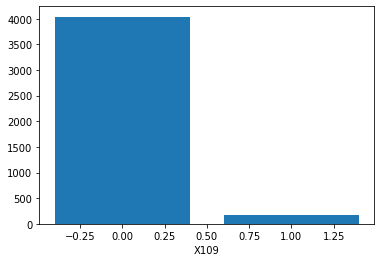

X110
features X110 has value counts:
 0    4205
1       4
Name: X110, dtype: int64
feature with low counts:X110
length of features:2


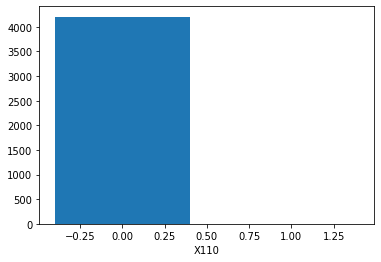

X111
features X111 has value counts:
 1    4103
0     106
Name: X111, dtype: int64
feature with low counts:X111
length of features:2


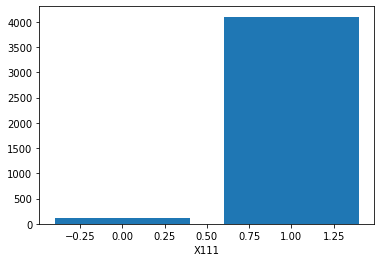

X112
features X112 has value counts:
 0    4197
1      12
Name: X112, dtype: int64
feature with low counts:X112
length of features:2


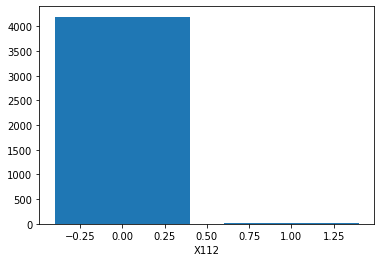

X113
features X113 has value counts:
 0    4115
1      94
Name: X113, dtype: int64
feature with low counts:X113
length of features:2


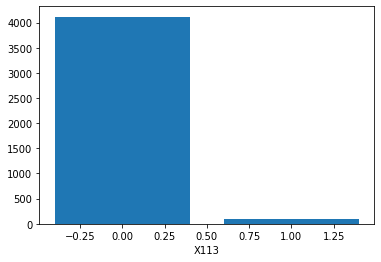

X114
features X114 has value counts:
 0    3594
1     615
Name: X114, dtype: int64
feature with low counts:X114
length of features:2


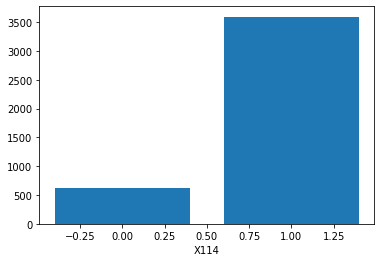

X115
features X115 has value counts:
 0    3007
1    1202
Name: X115, dtype: int64
feature with low counts:X115
length of features:2


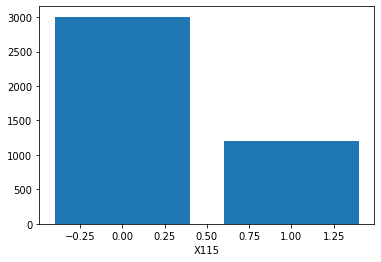

X116
features X116 has value counts:
 0    3381
1     828
Name: X116, dtype: int64
feature with low counts:X116
length of features:2


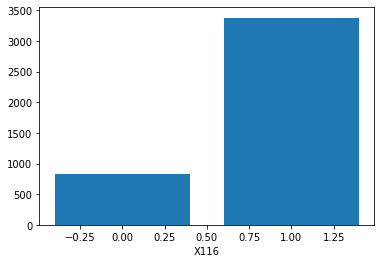

X117
features X117 has value counts:
 0    4002
1     207
Name: X117, dtype: int64
feature with low counts:X117
length of features:2


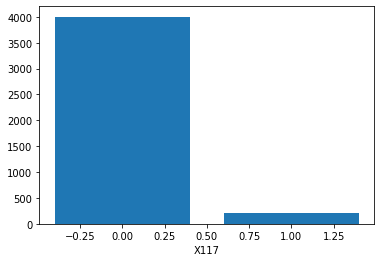

X118
features X118 has value counts:
 1    2619
0    1590
Name: X118, dtype: int64
feature with low counts:X118
length of features:2


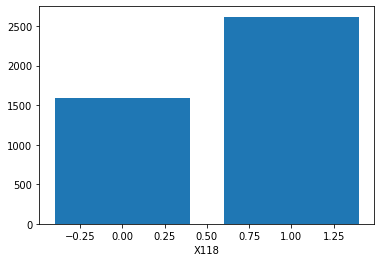

X119
features X119 has value counts:
 1    2619
0    1590
Name: X119, dtype: int64
feature with low counts:X119
length of features:2


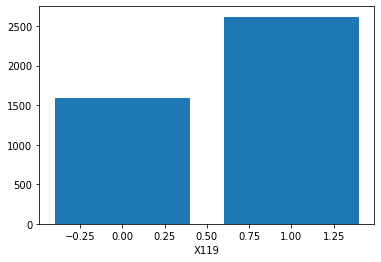

X120
features X120 has value counts:
 1    4031
0     178
Name: X120, dtype: int64
feature with low counts:X120
length of features:2


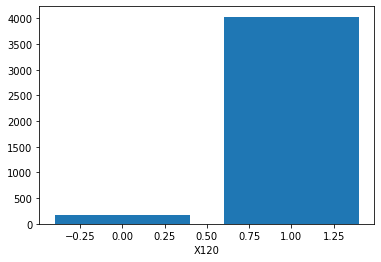

X122
features X122 has value counts:
 0    4179
1      30
Name: X122, dtype: int64
feature with low counts:X122
length of features:2


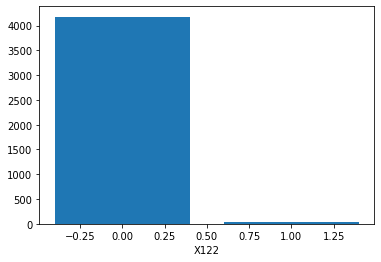

X123
features X123 has value counts:
 0    4198
1      11
Name: X123, dtype: int64
feature with low counts:X123
length of features:2


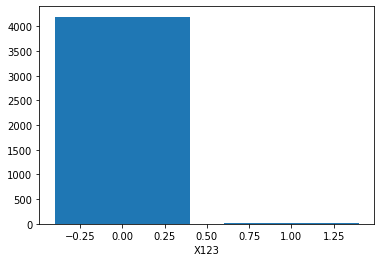

X124
features X124 has value counts:
 0    4207
1       2
Name: X124, dtype: int64
feature with low counts:X124
length of features:2


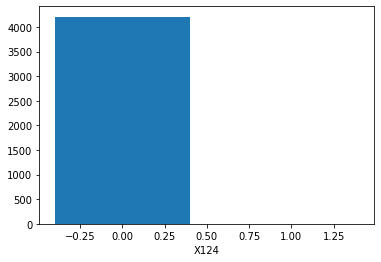

X125
features X125 has value counts:
 0    4196
1      13
Name: X125, dtype: int64
feature with low counts:X125
length of features:2


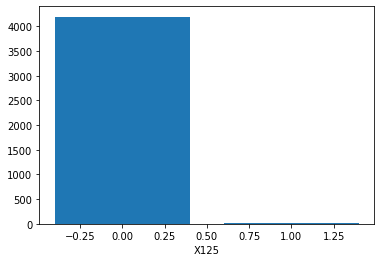

X126
features X126 has value counts:
 0    4045
1     164
Name: X126, dtype: int64
feature with low counts:X126
length of features:2


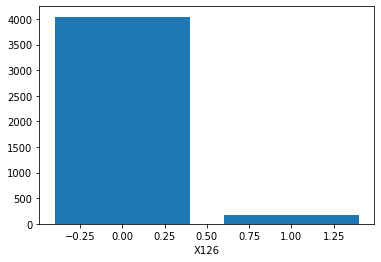

X127
features X127 has value counts:
 0    2125
1    2084
Name: X127, dtype: int64
feature with low counts:X127
length of features:2


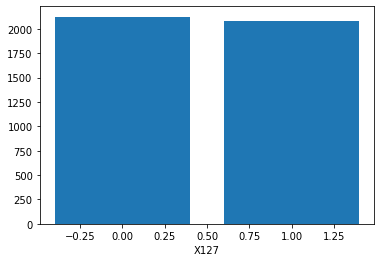

X128
features X128 has value counts:
 1    4034
0     175
Name: X128, dtype: int64
feature with low counts:X128
length of features:2


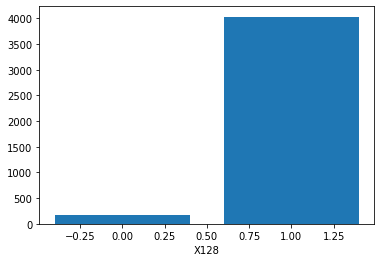

X129
features X129 has value counts:
 0    3693
1     516
Name: X129, dtype: int64
feature with low counts:X129
length of features:2


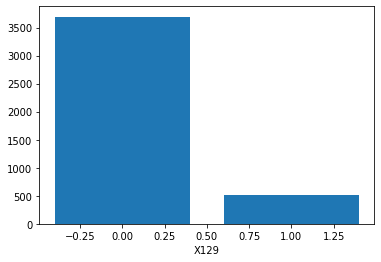

X130
features X130 has value counts:
 0    4034
1     175
Name: X130, dtype: int64
feature with low counts:X130
length of features:2


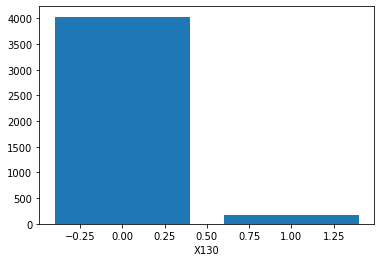

X131
features X131 has value counts:
 0    4097
1     112
Name: X131, dtype: int64
feature with low counts:X131
length of features:2


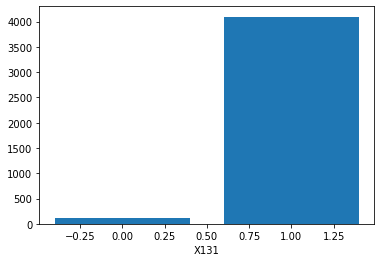

X132
features X132 has value counts:
 1    2898
0    1311
Name: X132, dtype: int64
feature with low counts:X132
length of features:2


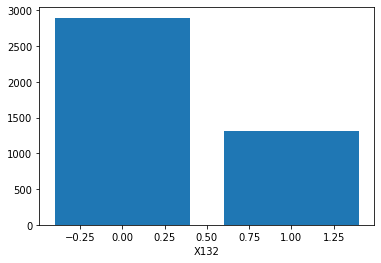

X133
features X133 has value counts:
 0    3686
1     523
Name: X133, dtype: int64
feature with low counts:X133
length of features:2


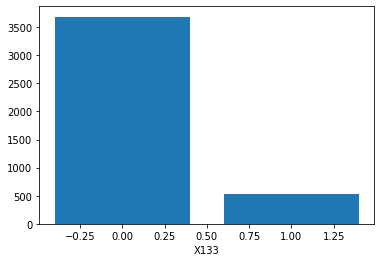

X134
features X134 has value counts:
 0    4115
1      94
Name: X134, dtype: int64
feature with low counts:X134
length of features:2


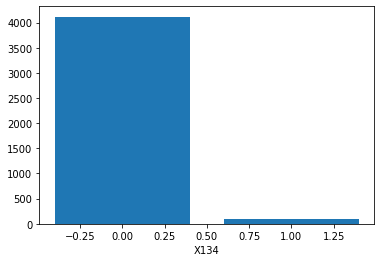

X135
features X135 has value counts:
 0    4095
1     114
Name: X135, dtype: int64
feature with low counts:X135
length of features:2


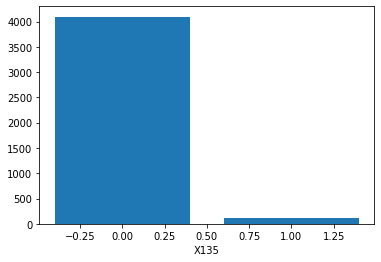

X136
features X136 has value counts:
 1    4026
0     183
Name: X136, dtype: int64
feature with low counts:X136
length of features:2


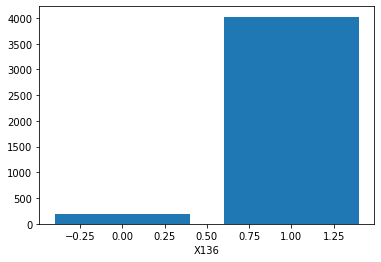

X137
features X137 has value counts:
 1    2449
0    1760
Name: X137, dtype: int64
feature with low counts:X137
length of features:2


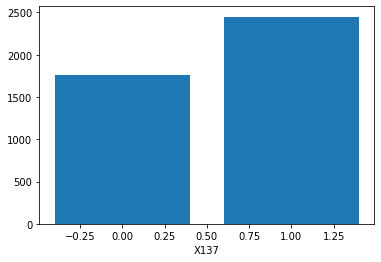

X138
features X138 has value counts:
 0    4037
1     172
Name: X138, dtype: int64
feature with low counts:X138
length of features:2


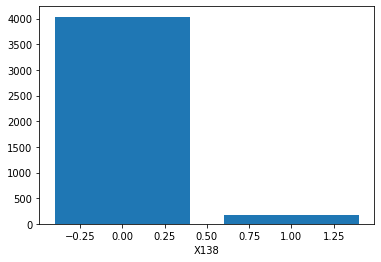

X139
features X139 has value counts:
 0    3828
1     381
Name: X139, dtype: int64
feature with low counts:X139
length of features:2


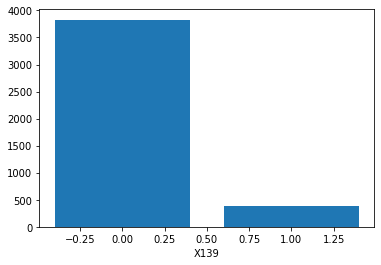

X140
features X140 has value counts:
 0    4039
1     170
Name: X140, dtype: int64
feature with low counts:X140
length of features:2


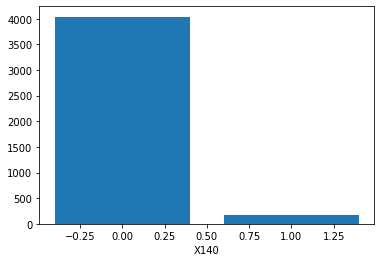

X141
features X141 has value counts:
 0    4149
1      60
Name: X141, dtype: int64
feature with low counts:X141
length of features:2


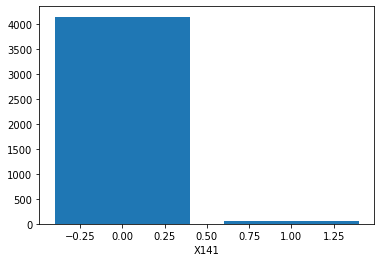

X142
features X142 has value counts:
 1    3242
0     967
Name: X142, dtype: int64
feature with low counts:X142
length of features:2


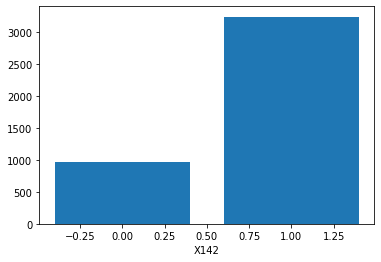

X143
features X143 has value counts:
 0    4048
1     161
Name: X143, dtype: int64
feature with low counts:X143
length of features:2


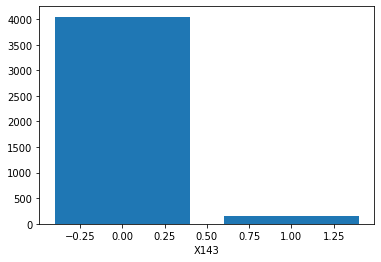

X144
features X144 has value counts:
 1    3401
0     808
Name: X144, dtype: int64
feature with low counts:X144
length of features:2


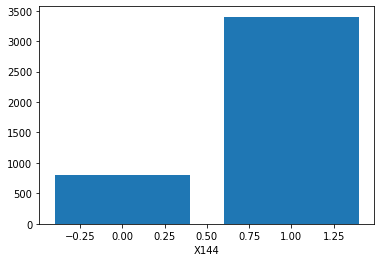

X145
features X145 has value counts:
 0    4203
1       6
Name: X145, dtype: int64
feature with low counts:X145
length of features:2


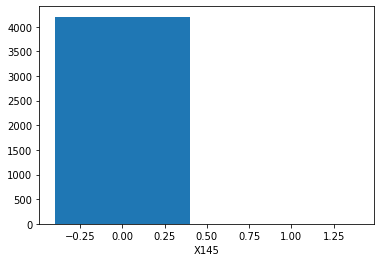

X146
features X146 has value counts:
 0    4037
1     172
Name: X146, dtype: int64
feature with low counts:X146
length of features:2


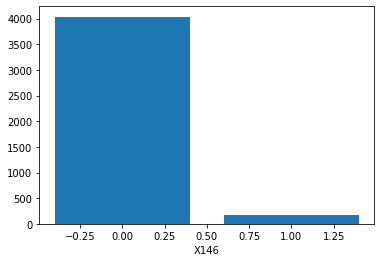

X147
features X147 has value counts:
 0    4115
1      94
Name: X147, dtype: int64
feature with low counts:X147
length of features:2


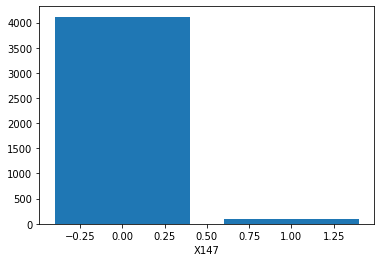

X148
features X148 has value counts:
 0    4020
1     189
Name: X148, dtype: int64
feature with low counts:X148
length of features:2


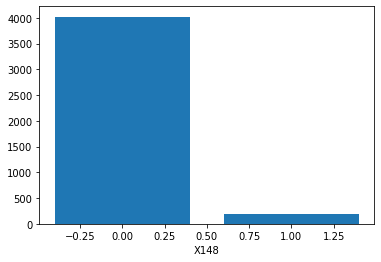

X150
features X150 has value counts:
 1    3335
0     874
Name: X150, dtype: int64
feature with low counts:X150
length of features:2


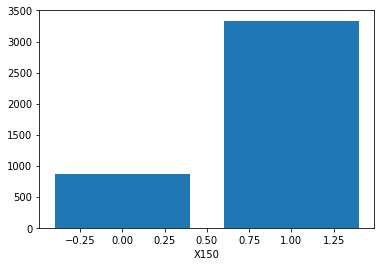

X151
features X151 has value counts:
 0    3849
1     360
Name: X151, dtype: int64
feature with low counts:X151
length of features:2


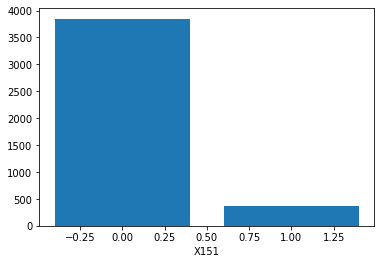

X152
features X152 has value counts:
 0    4073
1     136
Name: X152, dtype: int64
feature with low counts:X152
length of features:2


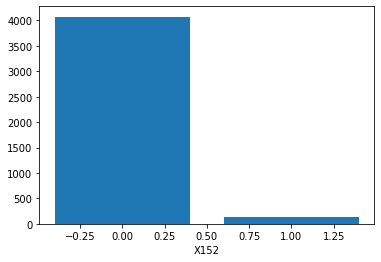

X153
features X153 has value counts:
 0    4206
1       3
Name: X153, dtype: int64
feature with low counts:X153
length of features:2


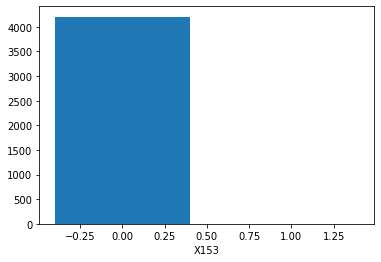

X154
features X154 has value counts:
 0    3330
1     879
Name: X154, dtype: int64
feature with low counts:X154
length of features:2


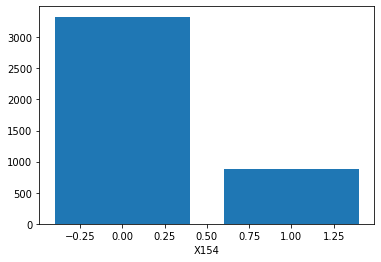

X155
features X155 has value counts:
 0    3887
1     322
Name: X155, dtype: int64
feature with low counts:X155
length of features:2


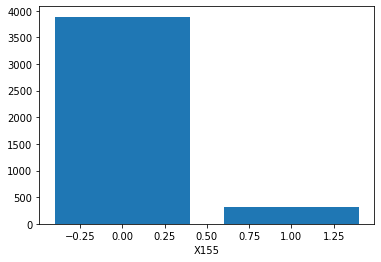

X156
features X156 has value counts:
 1    3019
0    1190
Name: X156, dtype: int64
feature with low counts:X156
length of features:2


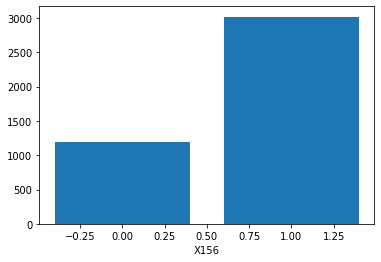

X157
features X157 has value counts:
 0    3019
1    1190
Name: X157, dtype: int64
feature with low counts:X157
length of features:2


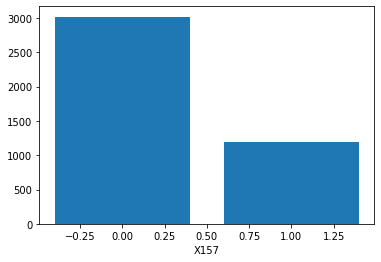

X158
features X158 has value counts:
 0    3242
1     967
Name: X158, dtype: int64
feature with low counts:X158
length of features:2


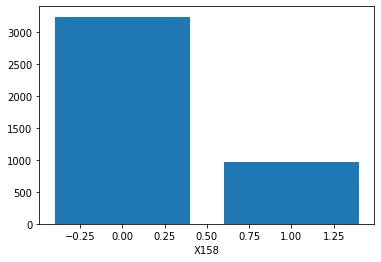

X159
features X159 has value counts:
 0    4152
1      57
Name: X159, dtype: int64
feature with low counts:X159
length of features:2


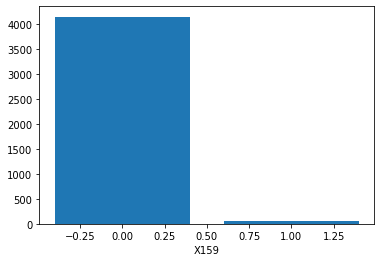

X160
features X160 has value counts:
 0    4204
1       5
Name: X160, dtype: int64
feature with low counts:X160
length of features:2


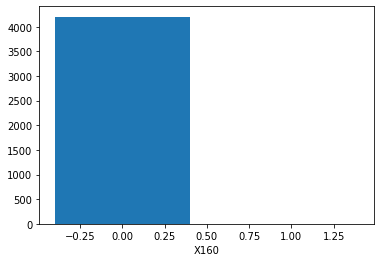

X161
features X161 has value counts:
 0    3377
1     832
Name: X161, dtype: int64
feature with low counts:X161
length of features:2


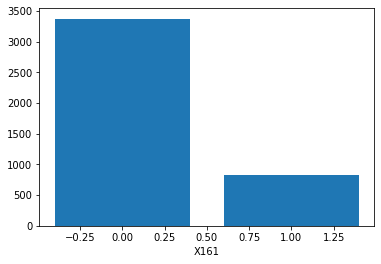

X162
features X162 has value counts:
 0    4037
1     172
Name: X162, dtype: int64
feature with low counts:X162
length of features:2


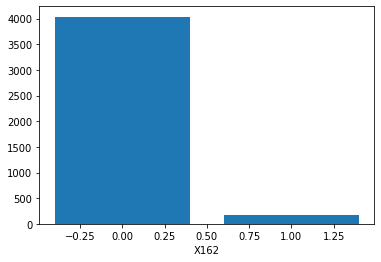

X163
features X163 has value counts:
 0    2932
1    1277
Name: X163, dtype: int64
feature with low counts:X163
length of features:2


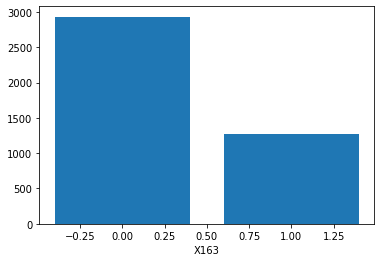

X164
features X164 has value counts:
 0    3946
1     263
Name: X164, dtype: int64
feature with low counts:X164
length of features:2


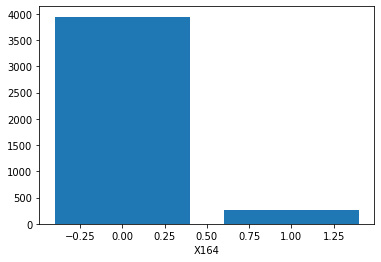

X165
features X165 has value counts:
 0    4190
1      19
Name: X165, dtype: int64
feature with low counts:X165
length of features:2


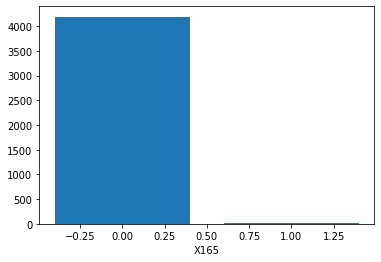

X166
features X166 has value counts:
 0    4069
1     140
Name: X166, dtype: int64
feature with low counts:X166
length of features:2


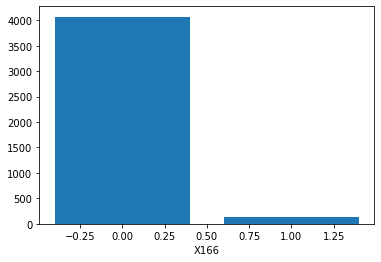

X167
features X167 has value counts:
 0    4205
1       4
Name: X167, dtype: int64
feature with low counts:X167
length of features:2


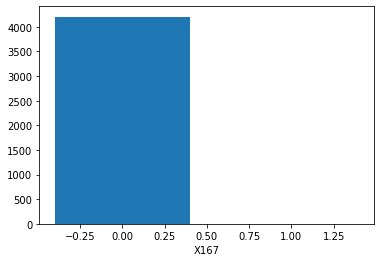

X168
features X168 has value counts:
 0    3069
1    1140
Name: X168, dtype: int64
feature with low counts:X168
length of features:2


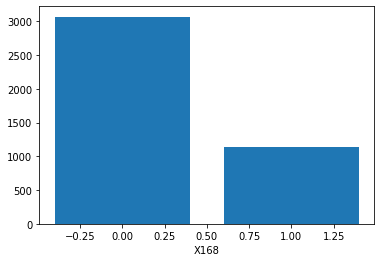

X169
features X169 has value counts:
 0    4181
1      28
Name: X169, dtype: int64
feature with low counts:X169
length of features:2


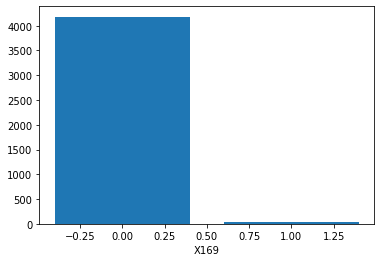

X170
features X170 has value counts:
 0    4107
1     102
Name: X170, dtype: int64
feature with low counts:X170
length of features:2


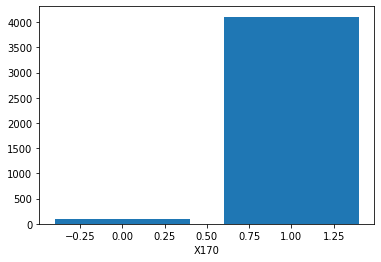

X171
features X171 has value counts:
 1    2767
0    1442
Name: X171, dtype: int64
feature with low counts:X171
length of features:2


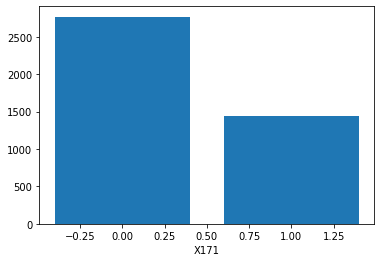

X172
features X172 has value counts:
 0    4184
1      25
Name: X172, dtype: int64
feature with low counts:X172
length of features:2


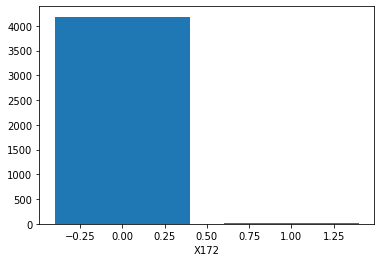

X173
features X173 has value counts:
 0    4168
1      41
Name: X173, dtype: int64
feature with low counts:X173
length of features:2


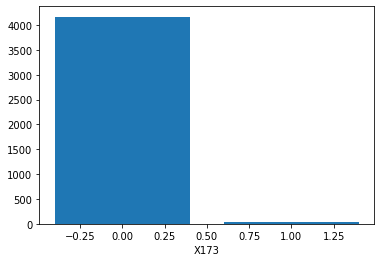

X174
features X174 has value counts:
 0    4136
1      73
Name: X174, dtype: int64
feature with low counts:X174
length of features:2


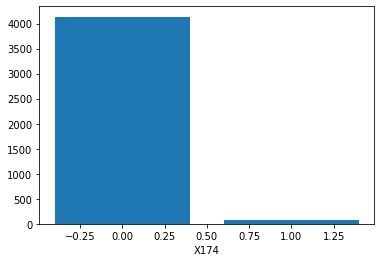

X175
features X175 has value counts:
 0    4115
1      94
Name: X175, dtype: int64
feature with low counts:X175
length of features:2


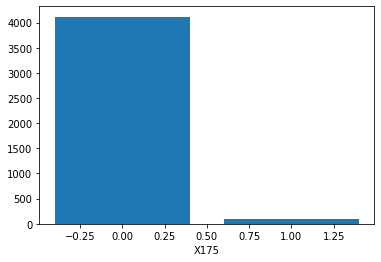

X176
features X176 has value counts:
 0    4137
1      72
Name: X176, dtype: int64
feature with low counts:X176
length of features:2


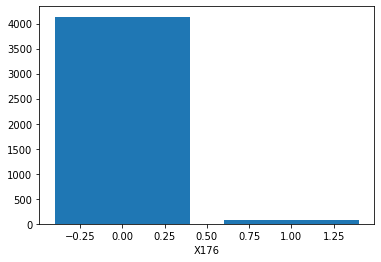

X177
features X177 has value counts:
 0    3998
1     211
Name: X177, dtype: int64
feature with low counts:X177
length of features:2


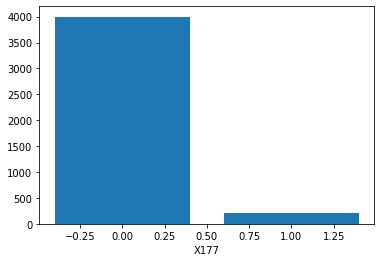

X178
features X178 has value counts:
 1    2346
0    1863
Name: X178, dtype: int64
feature with low counts:X178
length of features:2


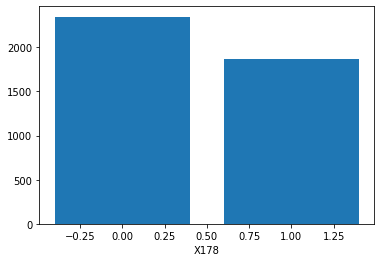

X179
features X179 has value counts:
 0    4007
1     202
Name: X179, dtype: int64
feature with low counts:X179
length of features:2


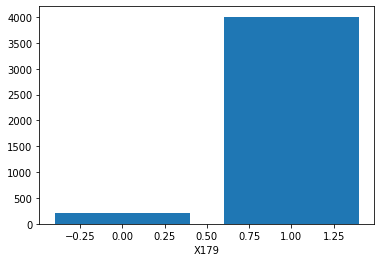

X180
features X180 has value counts:
 0    3544
1     665
Name: X180, dtype: int64
feature with low counts:X180
length of features:2


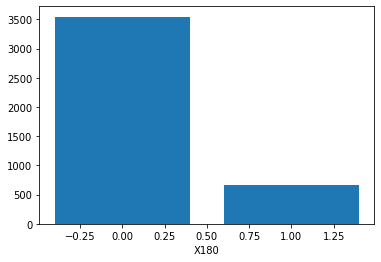

X181
features X181 has value counts:
 0    3814
1     395
Name: X181, dtype: int64
feature with low counts:X181
length of features:2


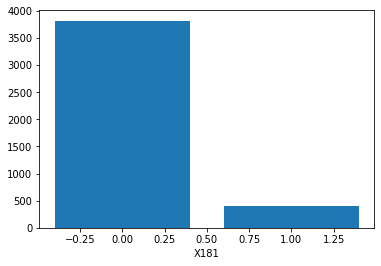

X182
features X182 has value counts:
 0    3762
1     447
Name: X182, dtype: int64
feature with low counts:X182
length of features:2


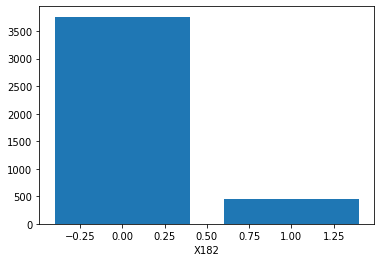

X183
features X183 has value counts:
 0    4192
1      17
Name: X183, dtype: int64
feature with low counts:X183
length of features:2


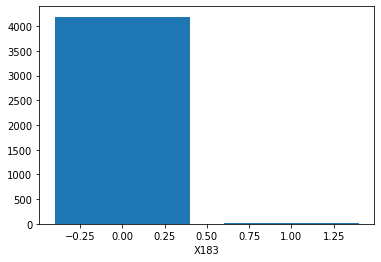

X184
features X184 has value counts:
 0    4203
1       6
Name: X184, dtype: int64
feature with low counts:X184
length of features:2


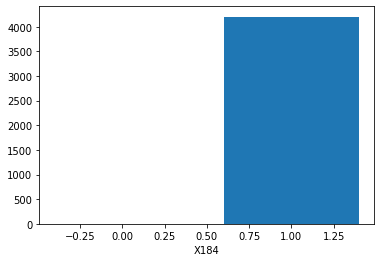

X185
features X185 has value counts:
 0    4130
1      79
Name: X185, dtype: int64
feature with low counts:X185
length of features:2


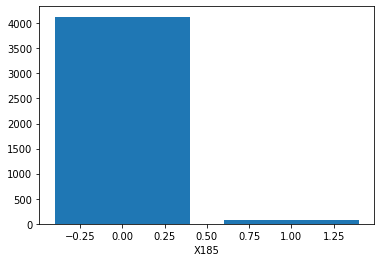

X186
features X186 has value counts:
 1    2256
0    1953
Name: X186, dtype: int64
feature with low counts:X186
length of features:2


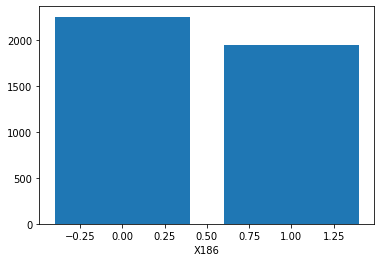

X187
features X187 has value counts:
 0    2439
1    1770
Name: X187, dtype: int64
feature with low counts:X187
length of features:2


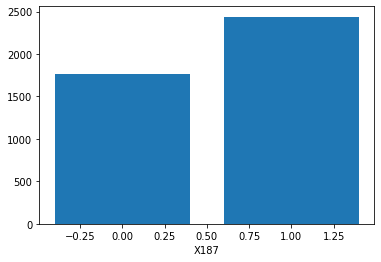

X189
features X189 has value counts:
 1    3853
0     356
Name: X189, dtype: int64
feature with low counts:X189
length of features:2


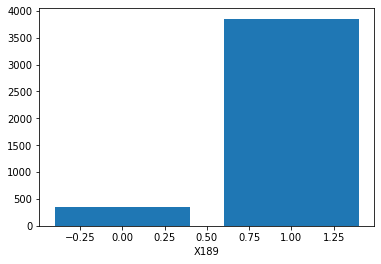

X190
features X190 has value counts:
 0    4208
1       1
Name: X190, dtype: int64
feature with low counts:X190
length of features:2


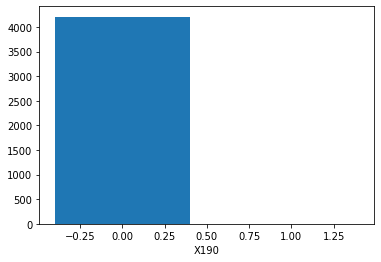

X191
features X191 has value counts:
 0    2227
1    1982
Name: X191, dtype: int64
feature with low counts:X191
length of features:2


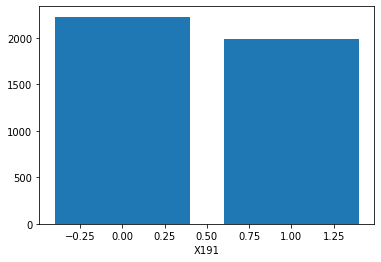

X192
features X192 has value counts:
 0    4199
1      10
Name: X192, dtype: int64
feature with low counts:X192
length of features:2


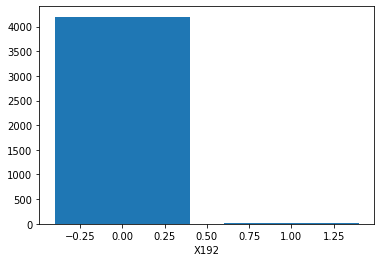

X194
features X194 has value counts:
 0    2256
1    1953
Name: X194, dtype: int64
feature with low counts:X194
length of features:2


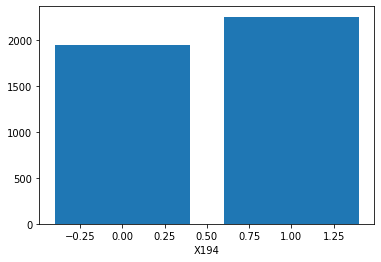

X195
features X195 has value counts:
 0    4160
1      49
Name: X195, dtype: int64
feature with low counts:X195
length of features:2


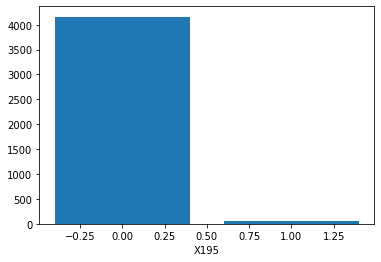

X196
features X196 has value counts:
 0    4166
1      43
Name: X196, dtype: int64
feature with low counts:X196
length of features:2


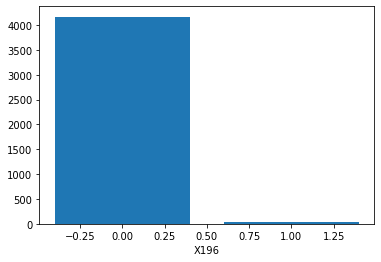

X197
features X197 has value counts:
 0    4073
1     136
Name: X197, dtype: int64
feature with low counts:X197
length of features:2


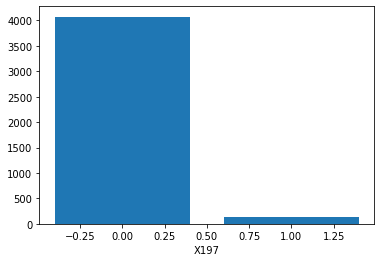

X198
features X198 has value counts:
 0    4112
1      97
Name: X198, dtype: int64
feature with low counts:X198
length of features:2


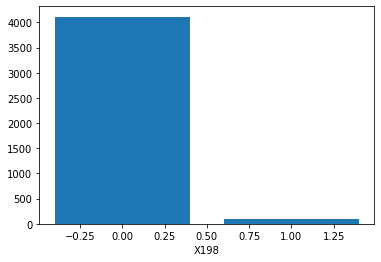

X199
features X199 has value counts:
 0    4197
1      12
Name: X199, dtype: int64
feature with low counts:X199
length of features:2


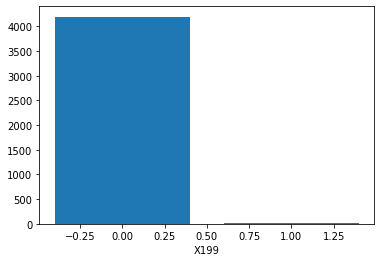

X200
features X200 has value counts:
 0    4181
1      28
Name: X200, dtype: int64
feature with low counts:X200
length of features:2


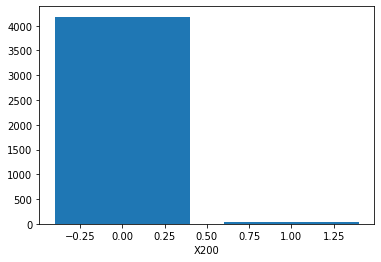

X201
features X201 has value counts:
 0    3461
1     748
Name: X201, dtype: int64
feature with low counts:X201
length of features:2


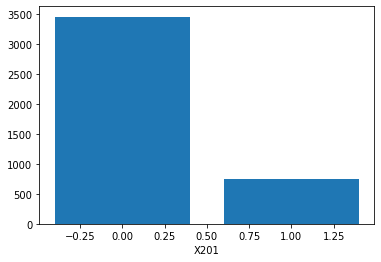

X202
features X202 has value counts:
 0    3193
1    1016
Name: X202, dtype: int64
feature with low counts:X202
length of features:2


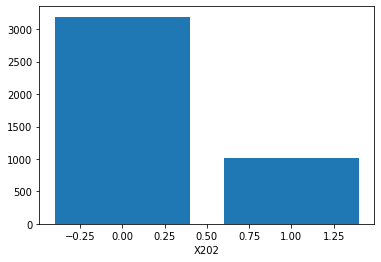

X203
features X203 has value counts:
 0    4138
1      71
Name: X203, dtype: int64
feature with low counts:X203
length of features:2


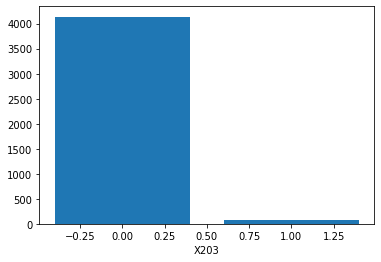

X204
features X204 has value counts:
 0    4208
1       1
Name: X204, dtype: int64
feature with low counts:X204
length of features:2


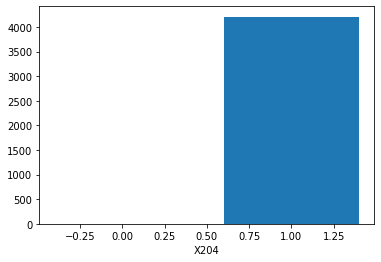

X205
features X205 has value counts:
 1    4208
0       1
Name: X205, dtype: int64
feature with low counts:X205
length of features:2


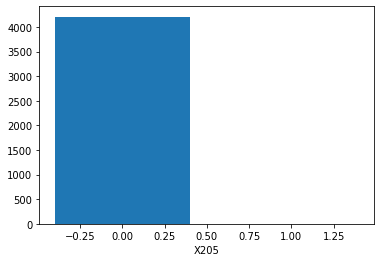

X206
features X206 has value counts:
 0    4128
1      81
Name: X206, dtype: int64
feature with low counts:X206
length of features:2


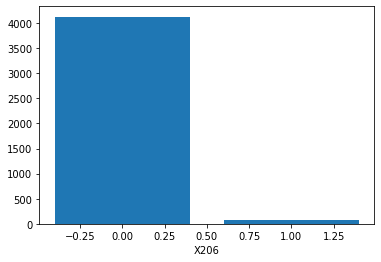

X207
features X207 has value counts:
 0    4208
1       1
Name: X207, dtype: int64
feature with low counts:X207
length of features:2


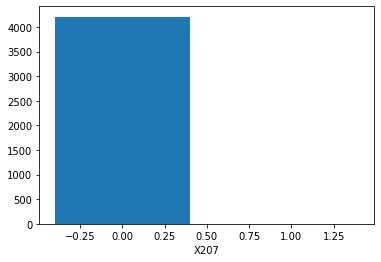

X208
features X208 has value counts:
 0    3944
1     265
Name: X208, dtype: int64
feature with low counts:X208
length of features:2


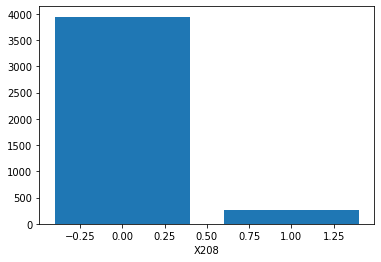

X209
features X209 has value counts:
 1    3782
0     427
Name: X209, dtype: int64
feature with low counts:X209
length of features:2


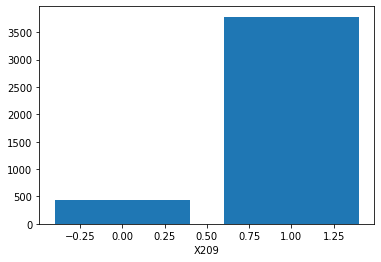

X210
features X210 has value counts:
 0    4208
1       1
Name: X210, dtype: int64
feature with low counts:X210
length of features:2


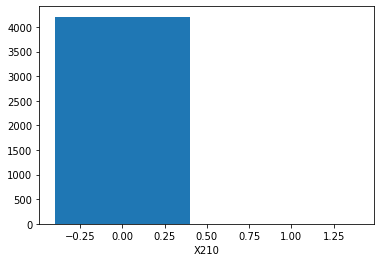

X211
features X211 has value counts:
 0    4146
1      63
Name: X211, dtype: int64
feature with low counts:X211
length of features:2


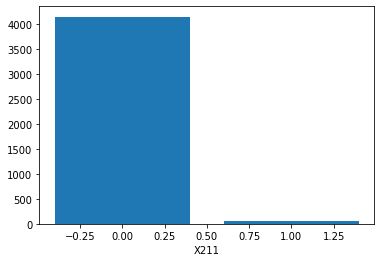

X212
features X212 has value counts:
 0    4186
1      23
Name: X212, dtype: int64
feature with low counts:X212
length of features:2


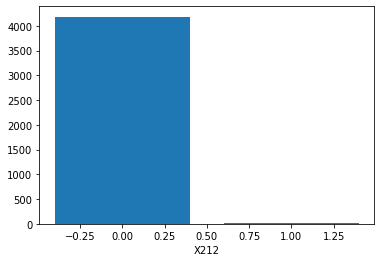

X213
features X213 has value counts:
 0    4201
1       8
Name: X213, dtype: int64
feature with low counts:X213
length of features:2


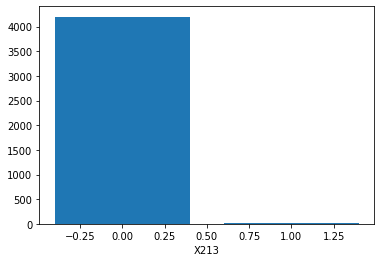

X214
features X214 has value counts:
 0    4180
1      29
Name: X214, dtype: int64
feature with low counts:X214
length of features:2


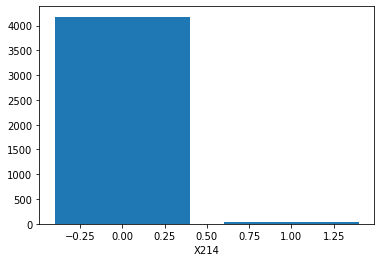

X215
features X215 has value counts:
 0    3794
1     415
Name: X215, dtype: int64
feature with low counts:X215
length of features:2


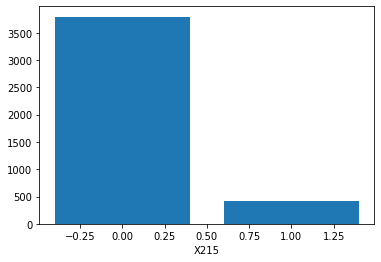

X216
features X216 has value counts:
 0    4184
1      25
Name: X216, dtype: int64
feature with low counts:X216
length of features:2


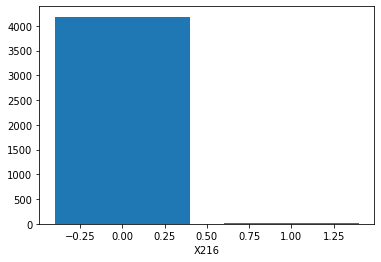

X217
features X217 has value counts:
 0    4178
1      31
Name: X217, dtype: int64
feature with low counts:X217
length of features:2


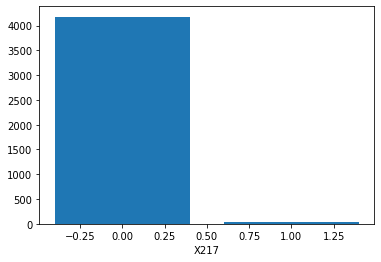

X218
features X218 has value counts:
 0    2894
1    1315
Name: X218, dtype: int64
feature with low counts:X218
length of features:2


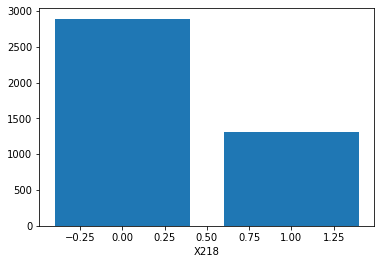

X219
features X219 has value counts:
 0    3925
1     284
Name: X219, dtype: int64
feature with low counts:X219
length of features:2


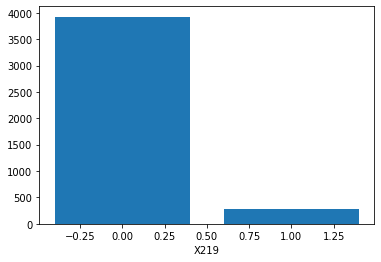

X220
features X220 has value counts:
 1    2362
0    1847
Name: X220, dtype: int64
feature with low counts:X220
length of features:2


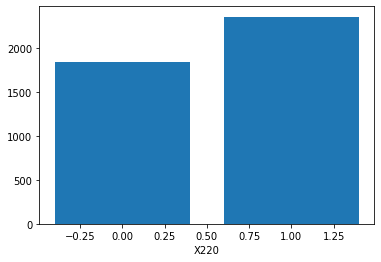

X221
features X221 has value counts:
 0    4175
1      34
Name: X221, dtype: int64
feature with low counts:X221
length of features:2


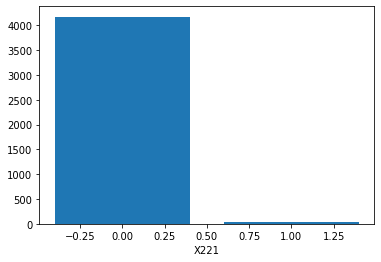

X222
features X222 has value counts:
 0    4115
1      94
Name: X222, dtype: int64
feature with low counts:X222
length of features:2


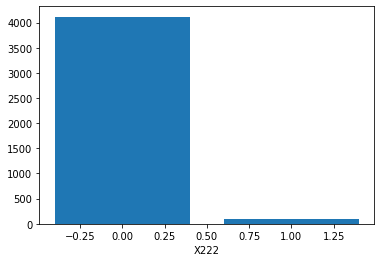

X223
features X223 has value counts:
 1    2337
0    1872
Name: X223, dtype: int64
feature with low counts:X223
length of features:2


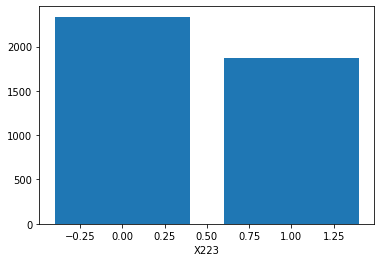

X224
features X224 has value counts:
 0    2873
1    1336
Name: X224, dtype: int64
feature with low counts:X224
length of features:2


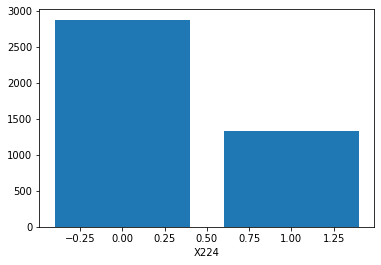

X225
features X225 has value counts:
 0    3801
1     408
Name: X225, dtype: int64
feature with low counts:X225
length of features:2


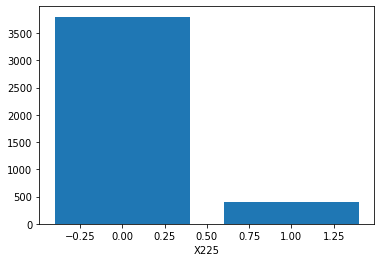

X226
features X226 has value counts:
 0    4073
1     136
Name: X226, dtype: int64
feature with low counts:X226
length of features:2


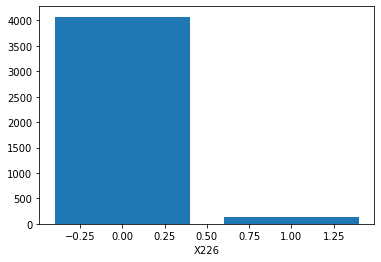

X227
features X227 has value counts:
 0    4196
1      13
Name: X227, dtype: int64
feature with low counts:X227
length of features:2


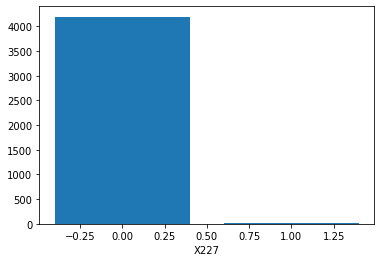

X228
features X228 has value counts:
 0    4045
1     164
Name: X228, dtype: int64
feature with low counts:X228
length of features:2


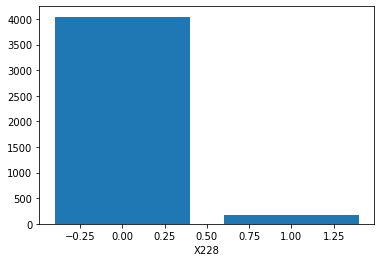

X229
features X229 has value counts:
 1    4041
0     168
Name: X229, dtype: int64
feature with low counts:X229
length of features:2


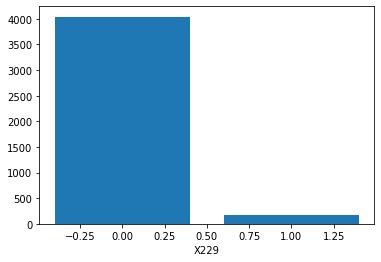

X230
features X230 has value counts:
 0    4187
1      22
Name: X230, dtype: int64
feature with low counts:X230
length of features:2


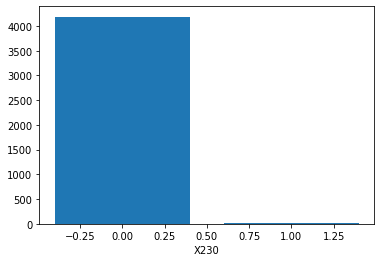

X231
features X231 has value counts:
 0    4141
1      68
Name: X231, dtype: int64
feature with low counts:X231
length of features:2


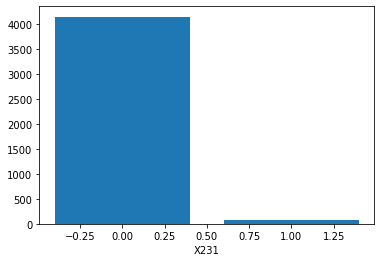

X232
features X232 has value counts:
 0    4028
1     181
Name: X232, dtype: int64
feature with low counts:X232
length of features:2


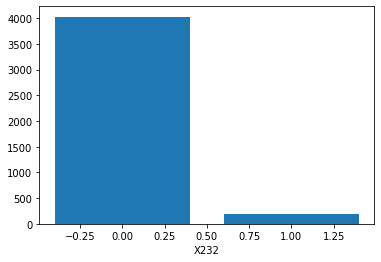

X233
features X233 has value counts:
 0    4209
Name: X233, dtype: int64
feature with low counts:X233
length of features:1


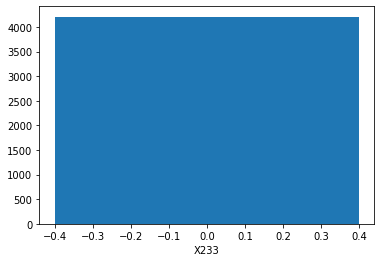

X234
features X234 has value counts:
 0    3360
1     849
Name: X234, dtype: int64
feature with low counts:X234
length of features:2


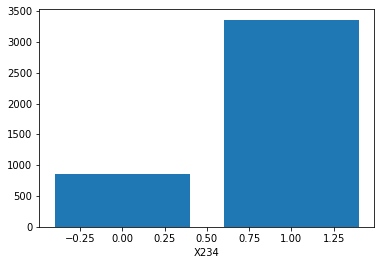

X235
features X235 has value counts:
 0    4209
Name: X235, dtype: int64
feature with low counts:X235
length of features:1


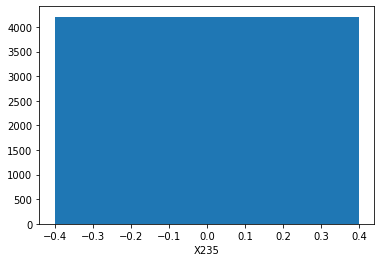

X236
features X236 has value counts:
 0    4207
1       2
Name: X236, dtype: int64
feature with low counts:X236
length of features:2


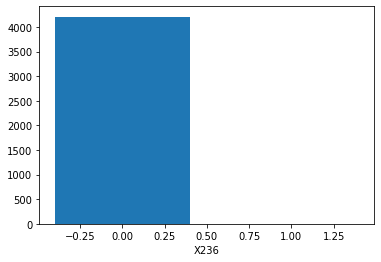

X237
features X237 has value counts:
 0    4181
1      28
Name: X237, dtype: int64
feature with low counts:X237
length of features:2


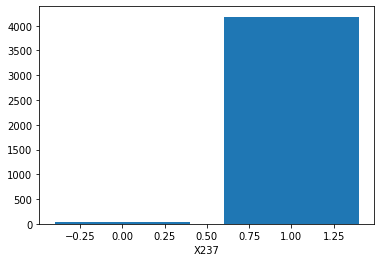

X238
features X238 has value counts:
 1    3856
0     353
Name: X238, dtype: int64
feature with low counts:X238
length of features:2


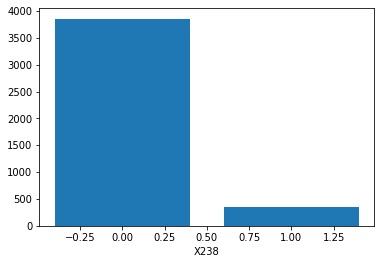

X239
features X239 has value counts:
 0    4180
1      29
Name: X239, dtype: int64
feature with low counts:X239
length of features:2


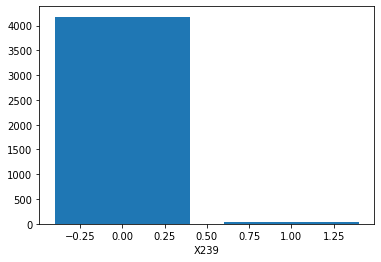

X240
features X240 has value counts:
 0    4197
1      12
Name: X240, dtype: int64
feature with low counts:X240
length of features:2


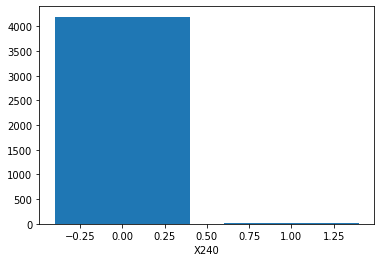

X241
features X241 has value counts:
 0    3800
1     409
Name: X241, dtype: int64
feature with low counts:X241
length of features:2


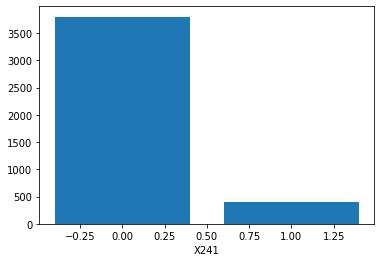

X242
features X242 has value counts:
 0    4178
1      31
Name: X242, dtype: int64
feature with low counts:X242
length of features:2


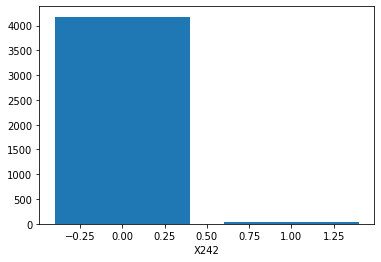

X243
features X243 has value counts:
 0    4179
1      30
Name: X243, dtype: int64
feature with low counts:X243
length of features:2


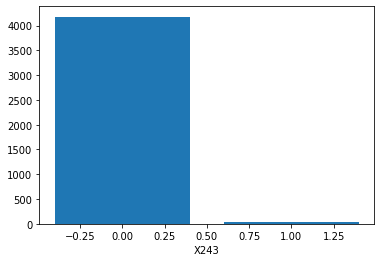

X244
features X244 has value counts:
 0    3773
1     436
Name: X244, dtype: int64
feature with low counts:X244
length of features:2


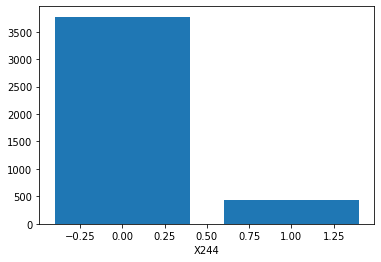

X245
features X245 has value counts:
 0    4206
1       3
Name: X245, dtype: int64
feature with low counts:X245
length of features:2


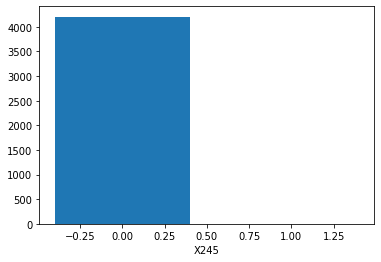

X246
features X246 has value counts:
 0    2486
1    1723
Name: X246, dtype: int64
feature with low counts:X246
length of features:2


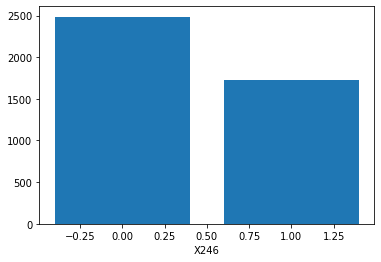

X247
features X247 has value counts:
 0    3193
1    1016
Name: X247, dtype: int64
feature with low counts:X247
length of features:2


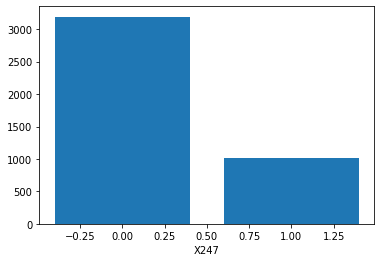

X248
features X248 has value counts:
 0    4203
1       6
Name: X248, dtype: int64
feature with low counts:X248
length of features:2


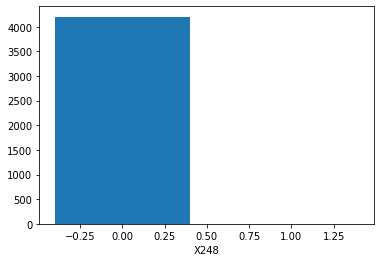

X249
features X249 has value counts:
 0    4177
1      32
Name: X249, dtype: int64
feature with low counts:X249
length of features:2


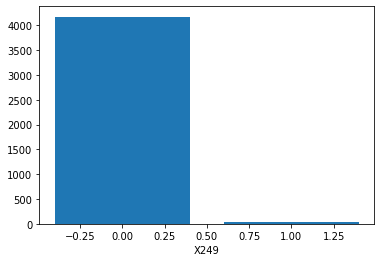

X250
features X250 has value counts:
 1    2327
0    1882
Name: X250, dtype: int64
feature with low counts:X250
length of features:2


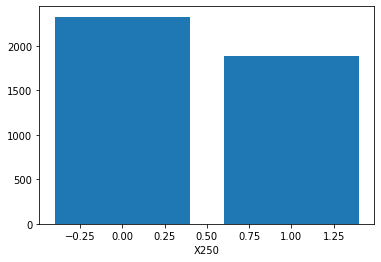

X251
features X251 has value counts:
 0    2550
1    1659
Name: X251, dtype: int64
feature with low counts:X251
length of features:2


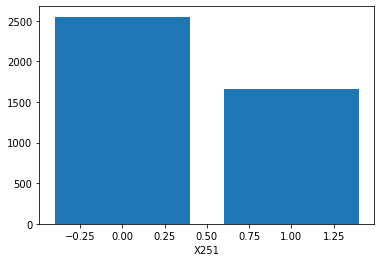

X252
features X252 has value counts:
 0    4206
1       3
Name: X252, dtype: int64
feature with low counts:X252
length of features:2


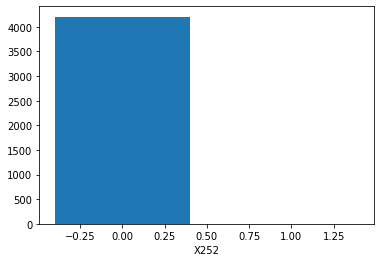

X253
features X253 has value counts:
 0    4203
1       6
Name: X253, dtype: int64
feature with low counts:X253
length of features:2


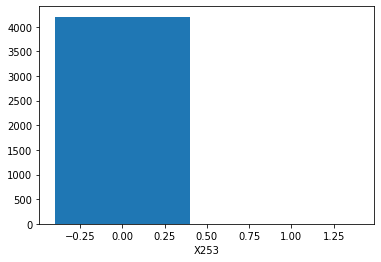

X254
features X254 has value counts:
 0    4187
1      22
Name: X254, dtype: int64
feature with low counts:X254
length of features:2


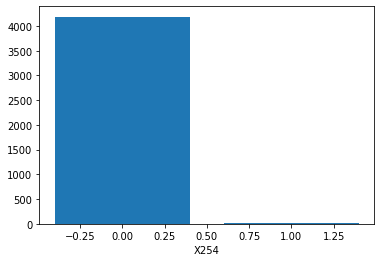

X255
features X255 has value counts:
 0    4127
1      82
Name: X255, dtype: int64
feature with low counts:X255
length of features:2


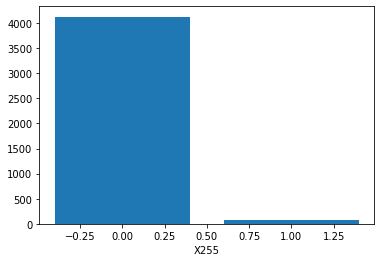

X256
features X256 has value counts:
 0    3901
1     308
Name: X256, dtype: int64
feature with low counts:X256
length of features:2


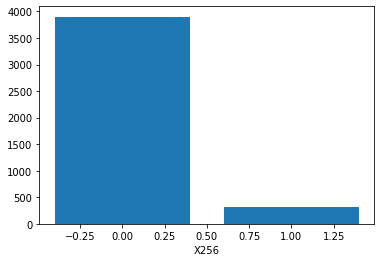

X257
features X257 has value counts:
 0    4208
1       1
Name: X257, dtype: int64
feature with low counts:X257
length of features:2


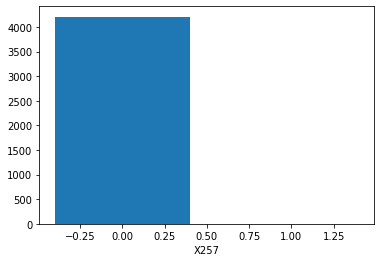

X258
features X258 has value counts:
 0    4199
1      10
Name: X258, dtype: int64
feature with low counts:X258
length of features:2


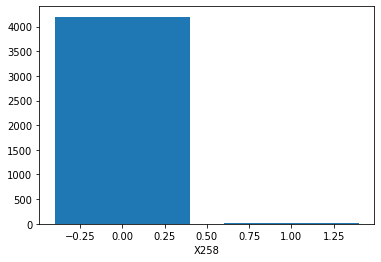

X259
features X259 has value counts:
 0    4208
1       1
Name: X259, dtype: int64
feature with low counts:X259
length of features:2


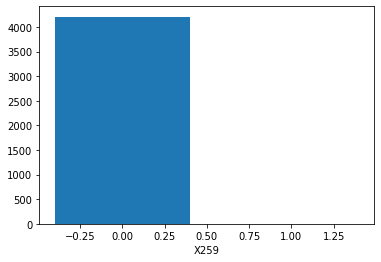

X260
features X260 has value counts:
 0    4208
1       1
Name: X260, dtype: int64
feature with low counts:X260
length of features:2


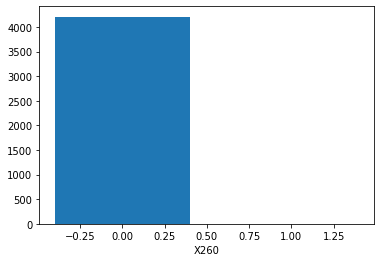

X261
features X261 has value counts:
 0    2443
1    1766
Name: X261, dtype: int64
feature with low counts:X261
length of features:2


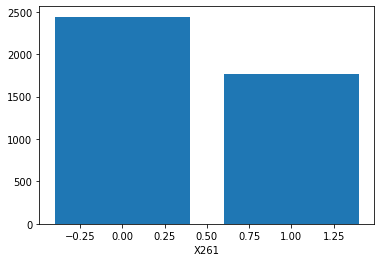

X262
features X262 has value counts:
 0    4203
1       6
Name: X262, dtype: int64
feature with low counts:X262
length of features:2


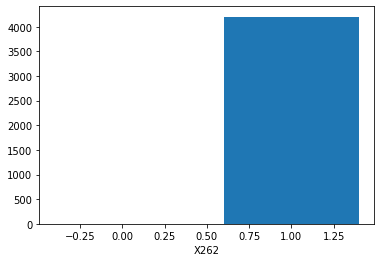

X263
features X263 has value counts:
 1    4028
0     181
Name: X263, dtype: int64
feature with low counts:X263
length of features:2


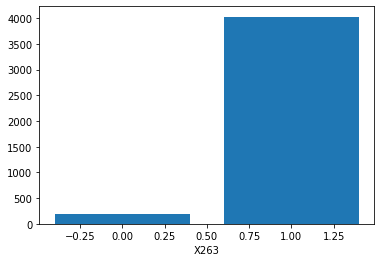

X264
features X264 has value counts:
 0    4043
1     166
Name: X264, dtype: int64
feature with low counts:X264
length of features:2


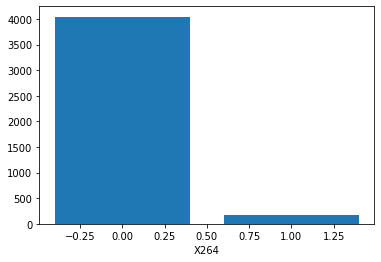

X265
features X265 has value counts:
 1    3811
0     398
Name: X265, dtype: int64
feature with low counts:X265
length of features:2


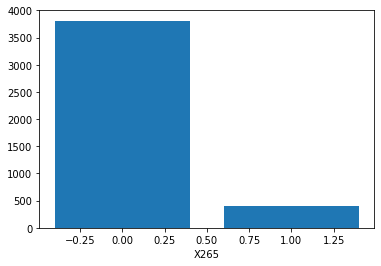

X266
features X266 has value counts:
 0    4203
1       6
Name: X266, dtype: int64
feature with low counts:X266
length of features:2


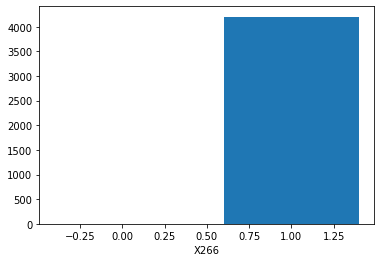

X267
features X267 has value counts:
 0    4171
1      38
Name: X267, dtype: int64
feature with low counts:X267
length of features:2


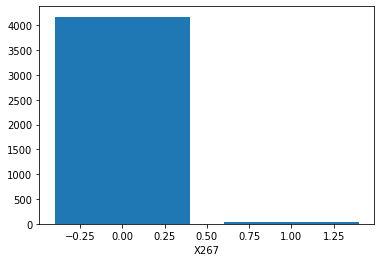

X268
features X268 has value counts:
 0    4209
Name: X268, dtype: int64
feature with low counts:X268
length of features:1


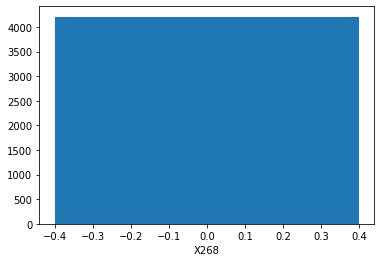

X269
features X269 has value counts:
 0    4207
1       2
Name: X269, dtype: int64
feature with low counts:X269
length of features:2


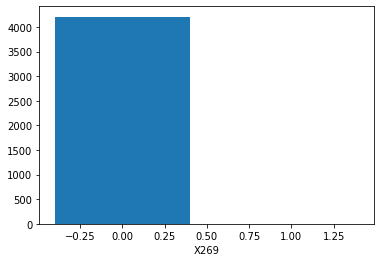

X270
features X270 has value counts:
 0    4208
1       1
Name: X270, dtype: int64
feature with low counts:X270
length of features:2


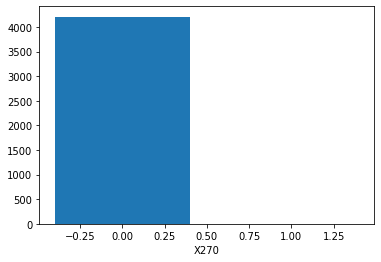

X271
features X271 has value counts:
 0    4200
1       9
Name: X271, dtype: int64
feature with low counts:X271
length of features:2


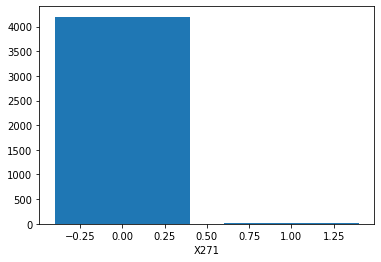

X272
features X272 has value counts:
 0    4051
1     158
Name: X272, dtype: int64
feature with low counts:X272
length of features:2


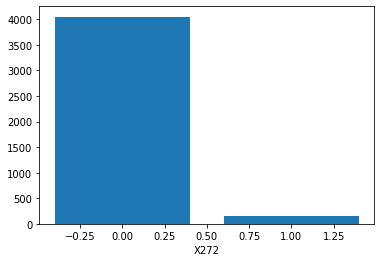

X273
features X273 has value counts:
 1    3031
0    1178
Name: X273, dtype: int64
feature with low counts:X273
length of features:2


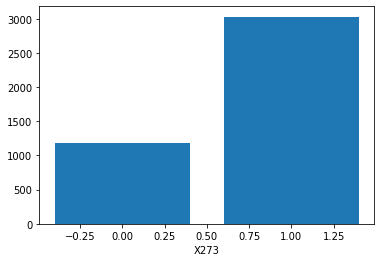

X274
features X274 has value counts:
 0    4167
1      42
Name: X274, dtype: int64
feature with low counts:X274
length of features:2


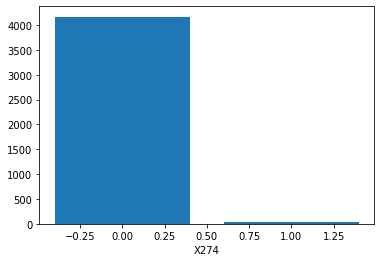

X275
features X275 has value counts:
 1    3059
0    1150
Name: X275, dtype: int64
feature with low counts:X275
length of features:2


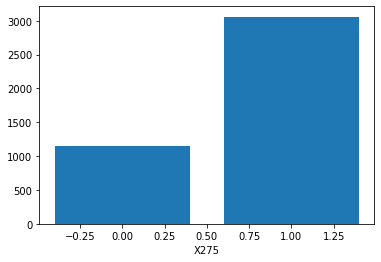

X276
features X276 has value counts:
 0    4047
1     162
Name: X276, dtype: int64
feature with low counts:X276
length of features:2


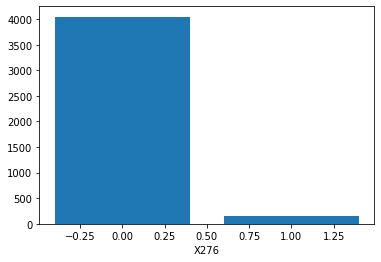

X277
features X277 has value counts:
 0    4203
1       6
Name: X277, dtype: int64
feature with low counts:X277
length of features:2


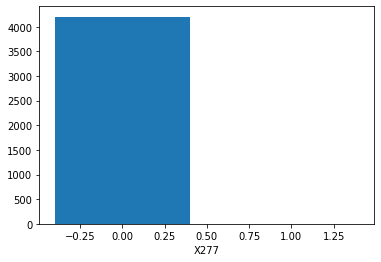

X278
features X278 has value counts:
 0    4207
1       2
Name: X278, dtype: int64
feature with low counts:X278
length of features:2


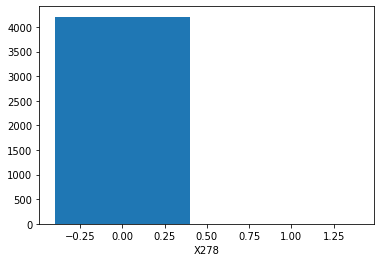

X279
features X279 has value counts:
 0    4028
1     181
Name: X279, dtype: int64
feature with low counts:X279
length of features:2


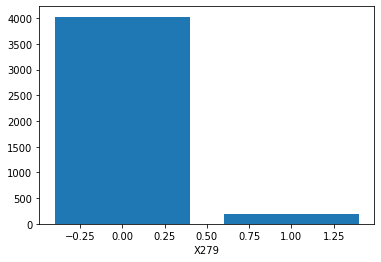

X280
features X280 has value counts:
 0    4208
1       1
Name: X280, dtype: int64
feature with low counts:X280
length of features:2


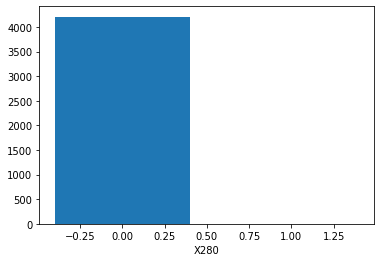

X281
features X281 has value counts:
 0    4198
1      11
Name: X281, dtype: int64
feature with low counts:X281
length of features:2


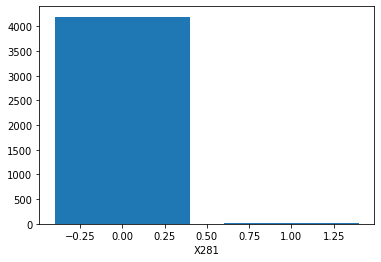

X282
features X282 has value counts:
 0    4192
1      17
Name: X282, dtype: int64
feature with low counts:X282
length of features:2


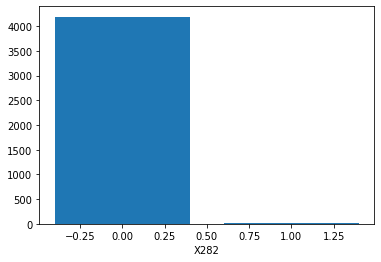

X283
features X283 has value counts:
 0    3617
1     592
Name: X283, dtype: int64
feature with low counts:X283
length of features:2


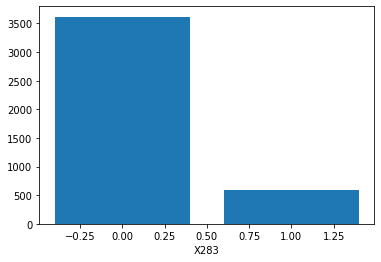

X284
features X284 has value counts:
 0    4036
1     173
Name: X284, dtype: int64
feature with low counts:X284
length of features:2


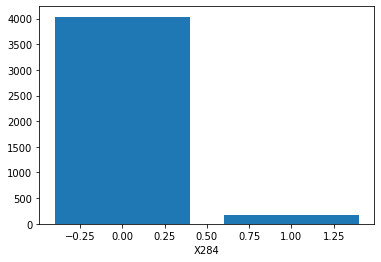

X285
features X285 has value counts:
 0    3343
1     866
Name: X285, dtype: int64
feature with low counts:X285
length of features:2


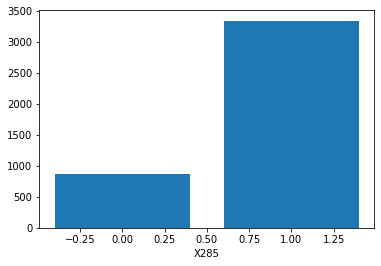

X286
features X286 has value counts:
 0    3979
1     230
Name: X286, dtype: int64
feature with low counts:X286
length of features:2


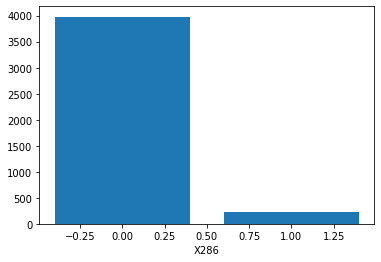

X287
features X287 has value counts:
 0    4142
1      67
Name: X287, dtype: int64
feature with low counts:X287
length of features:2


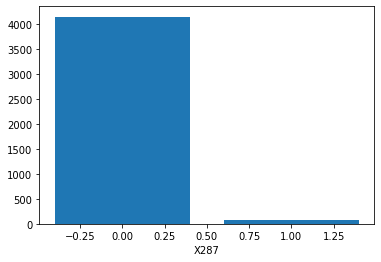

X288
features X288 has value counts:
 0    4208
1       1
Name: X288, dtype: int64
feature with low counts:X288
length of features:2


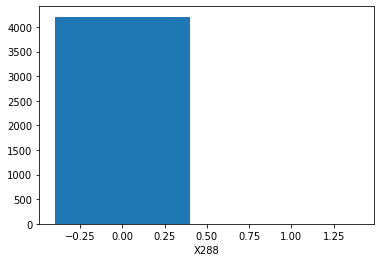

X289
features X289 has value counts:
 0    4209
Name: X289, dtype: int64
feature with low counts:X289
length of features:1


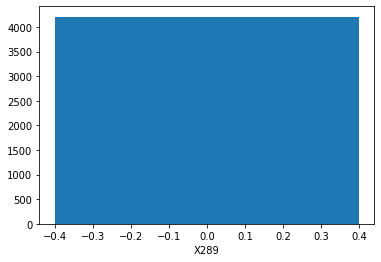

X290
features X290 has value counts:
 0    4209
Name: X290, dtype: int64
feature with low counts:X290
length of features:1


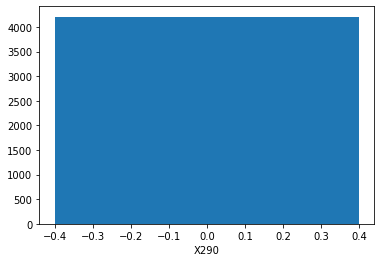

X291
features X291 has value counts:
 0    4165
1      44
Name: X291, dtype: int64
feature with low counts:X291
length of features:2


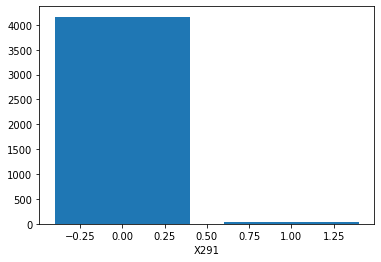

X292
features X292 has value counts:
 0    4171
1      38
Name: X292, dtype: int64
feature with low counts:X292
length of features:2


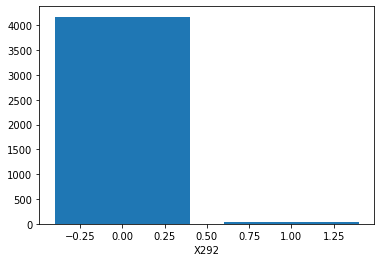

X293
features X293 has value counts:
 0    4209
Name: X293, dtype: int64
feature with low counts:X293
length of features:1


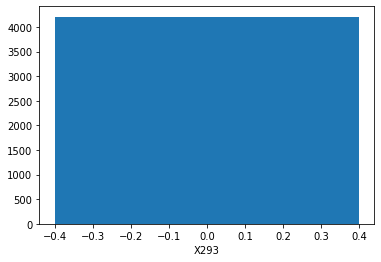

X294
features X294 has value counts:
 0    3683
1     526
Name: X294, dtype: int64
feature with low counts:X294
length of features:2


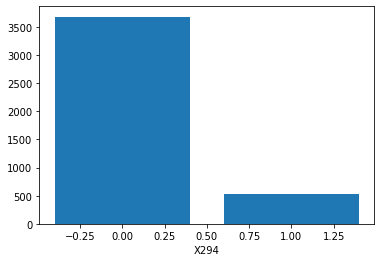

X295
features X295 has value counts:
 0    4208
1       1
Name: X295, dtype: int64
feature with low counts:X295
length of features:2


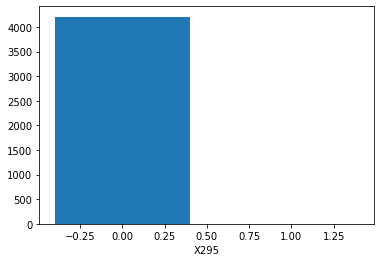

X296
features X296 has value counts:
 0    4208
1       1
Name: X296, dtype: int64
feature with low counts:X296
length of features:2


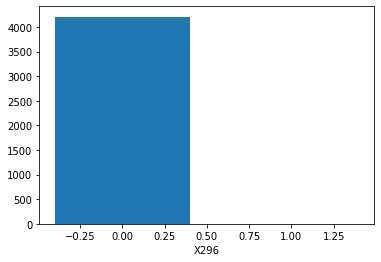

X297
features X297 has value counts:
 0    4209
Name: X297, dtype: int64
feature with low counts:X297
length of features:1


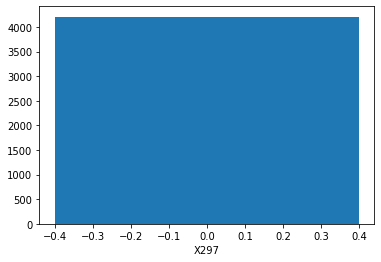

X298
features X298 has value counts:
 0    4190
1      19
Name: X298, dtype: int64
feature with low counts:X298
length of features:2


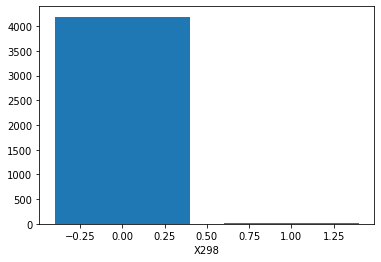

X299
features X299 has value counts:
 0    4190
1      19
Name: X299, dtype: int64
feature with low counts:X299
length of features:2


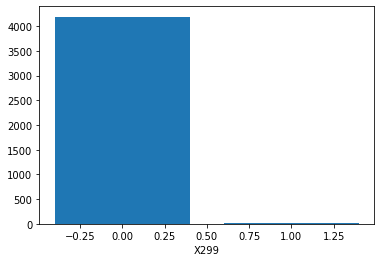

X300
features X300 has value counts:
 0    3338
1     871
Name: X300, dtype: int64
feature with low counts:X300
length of features:2


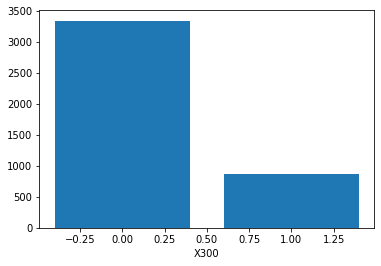

X301
features X301 has value counts:
 0    4012
1     197
Name: X301, dtype: int64
feature with low counts:X301
length of features:2


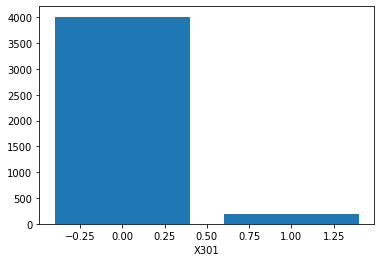

X302
features X302 has value counts:
 0    4161
1      48
Name: X302, dtype: int64
feature with low counts:X302
length of features:2


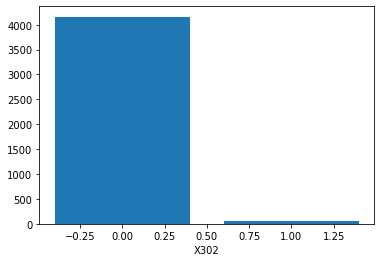

X304
features X304 has value counts:
 1    3890
0     319
Name: X304, dtype: int64
feature with low counts:X304
length of features:2


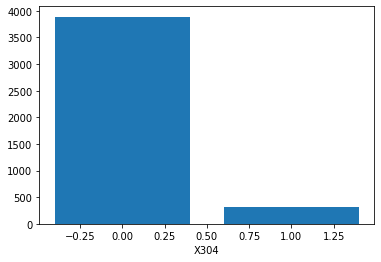

X305
features X305 has value counts:
 0    4153
1      56
Name: X305, dtype: int64
feature with low counts:X305
length of features:2


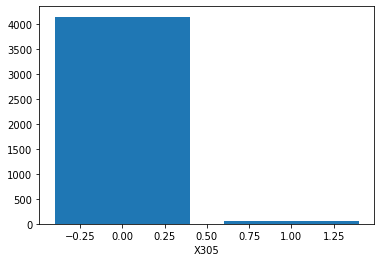

X306
features X306 has value counts:
 0    4025
1     184
Name: X306, dtype: int64
feature with low counts:X306
length of features:2


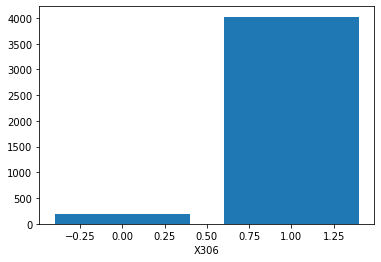

X307
features X307 has value counts:
 0    4200
1       9
Name: X307, dtype: int64
feature with low counts:X307
length of features:2


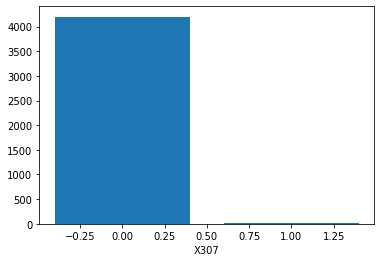

X308
features X308 has value counts:
 0    4169
1      40
Name: X308, dtype: int64
feature with low counts:X308
length of features:2


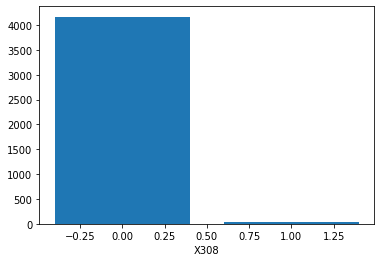

X309
features X309 has value counts:
 0    4179
1      30
Name: X309, dtype: int64
feature with low counts:X309
length of features:2


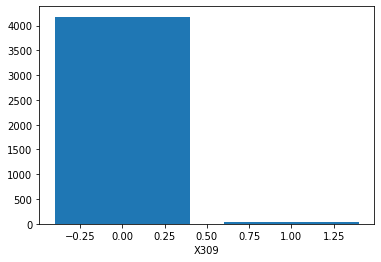

X310
features X310 has value counts:
 0    4198
1      11
Name: X310, dtype: int64
feature with low counts:X310
length of features:2


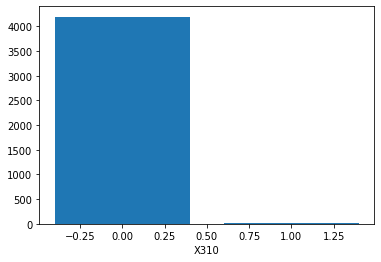

X311
features X311 has value counts:
 1    2519
0    1690
Name: X311, dtype: int64
feature with low counts:X311
length of features:2


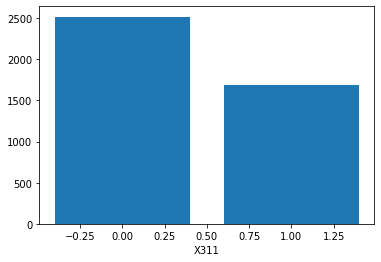

X312
features X312 has value counts:
 0    4191
1      18
Name: X312, dtype: int64
feature with low counts:X312
length of features:2


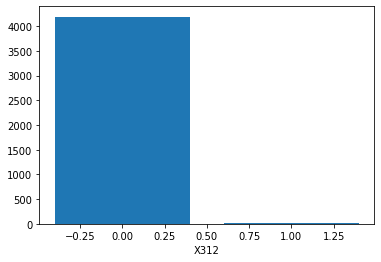

X313
features X313 has value counts:
 0    2942
1    1267
Name: X313, dtype: int64
feature with low counts:X313
length of features:2


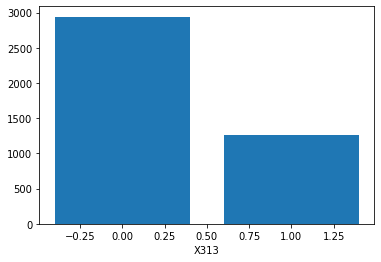

X314
features X314 has value counts:
 0    2392
1    1817
Name: X314, dtype: int64
feature with low counts:X314
length of features:2


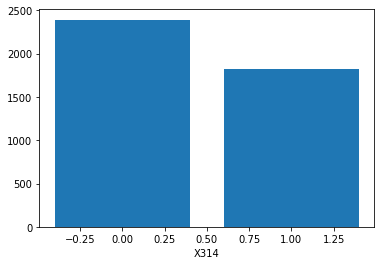

X315
features X315 has value counts:
 0    4088
1     121
Name: X315, dtype: int64
feature with low counts:X315
length of features:2


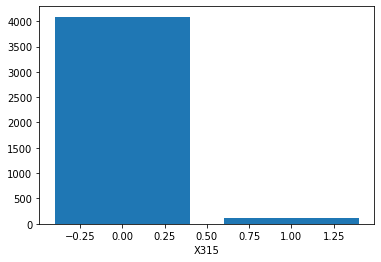

X316
features X316 has value counts:
 0    3386
1     823
Name: X316, dtype: int64
feature with low counts:X316
length of features:2


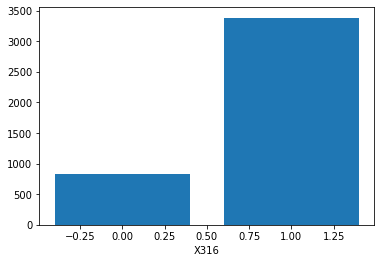

X317
features X317 has value counts:
 0    4177
1      32
Name: X317, dtype: int64
feature with low counts:X317
length of features:2


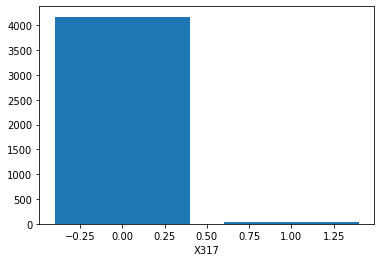

X318
features X318 has value counts:
 0    4206
1       3
Name: X318, dtype: int64
feature with low counts:X318
length of features:2


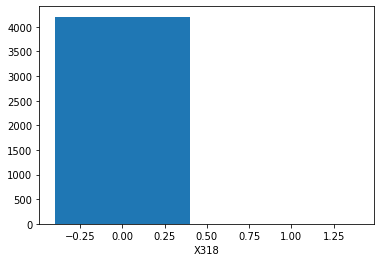

X319
features X319 has value counts:
 0    4207
1       2
Name: X319, dtype: int64
feature with low counts:X319
length of features:2


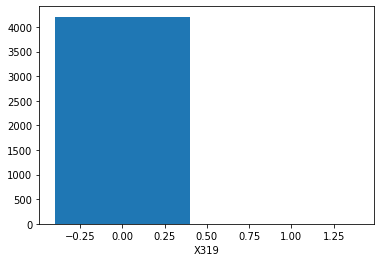

X320
features X320 has value counts:
 0    4179
1      30
Name: X320, dtype: int64
feature with low counts:X320
length of features:2


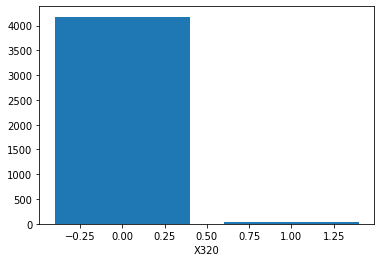

X321
features X321 has value counts:
 0    3204
1    1005
Name: X321, dtype: int64
feature with low counts:X321
length of features:2


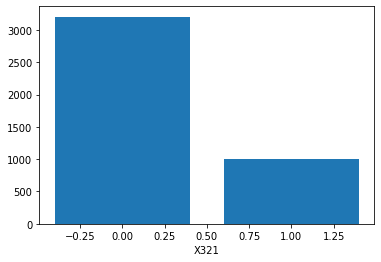

X322
features X322 has value counts:
 0    4117
1      92
Name: X322, dtype: int64
feature with low counts:X322
length of features:2


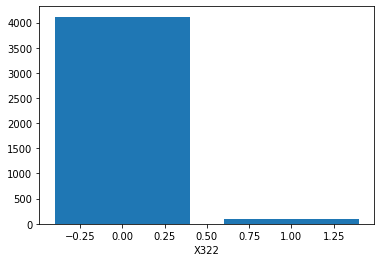

X323
features X323 has value counts:
 0    4170
1      39
Name: X323, dtype: int64
feature with low counts:X323
length of features:2


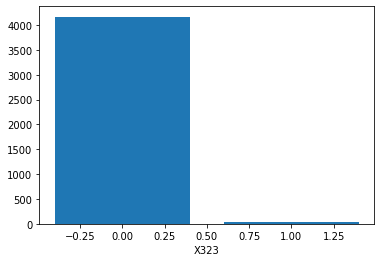

X324
features X324 has value counts:
 1    2420
0    1789
Name: X324, dtype: int64
feature with low counts:X324
length of features:2


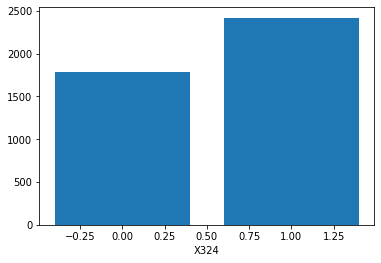

X325
features X325 has value counts:
 0    4185
1      24
Name: X325, dtype: int64
feature with low counts:X325
length of features:2


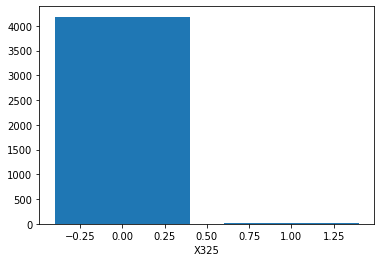

X326
features X326 has value counts:
 0    4073
1     136
Name: X326, dtype: int64
feature with low counts:X326
length of features:2


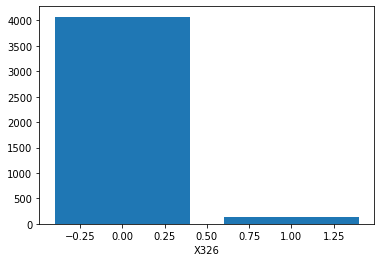

X327
features X327 has value counts:
 0    3669
1     540
Name: X327, dtype: int64
feature with low counts:X327
length of features:2


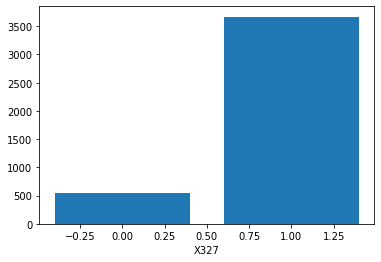

X328
features X328 has value counts:
 0    4040
1     169
Name: X328, dtype: int64
feature with low counts:X328
length of features:2


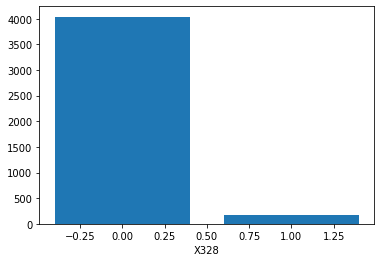

X329
features X329 has value counts:
 0    2377
1    1832
Name: X329, dtype: int64
feature with low counts:X329
length of features:2


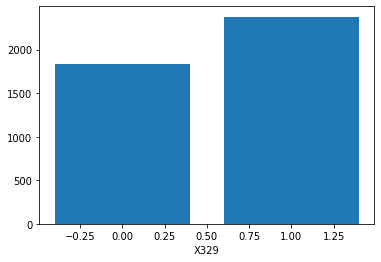

X330
features X330 has value counts:
 0    4209
Name: X330, dtype: int64
feature with low counts:X330
length of features:1


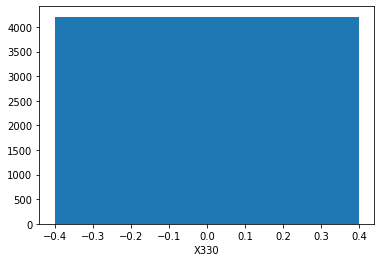

X331
features X331 has value counts:
 0    3973
1     236
Name: X331, dtype: int64
feature with low counts:X331
length of features:2


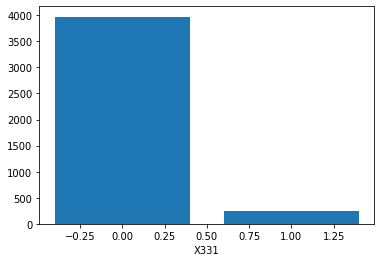

X332
features X332 has value counts:
 0    4206
1       3
Name: X332, dtype: int64
feature with low counts:X332
length of features:2


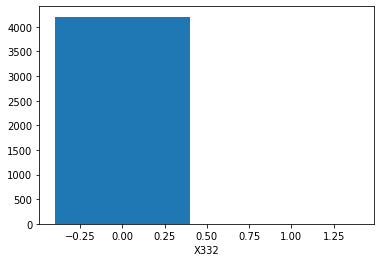

X333
features X333 has value counts:
 0    4108
1     101
Name: X333, dtype: int64
feature with low counts:X333
length of features:2


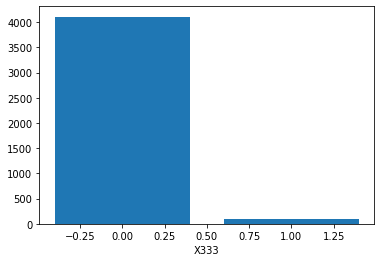

X334
features X334 has value counts:
 0    2262
1    1947
Name: X334, dtype: int64
feature with low counts:X334
length of features:2


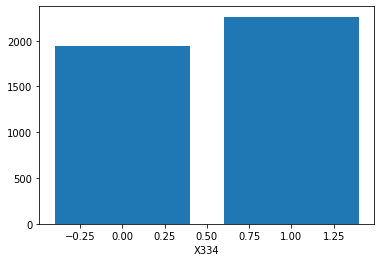

X335
features X335 has value counts:
 0    4194
1      15
Name: X335, dtype: int64
feature with low counts:X335
length of features:2


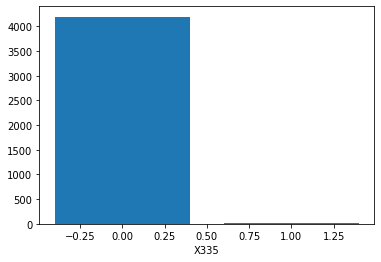

X336
features X336 has value counts:
 0    3673
1     536
Name: X336, dtype: int64
feature with low counts:X336
length of features:2


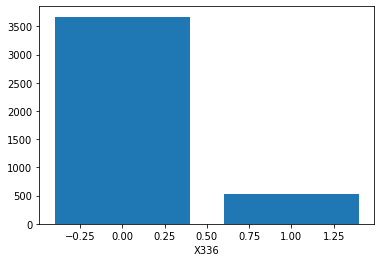

X337
features X337 has value counts:
 1    2174
0    2035
Name: X337, dtype: int64
feature with low counts:X337
length of features:2


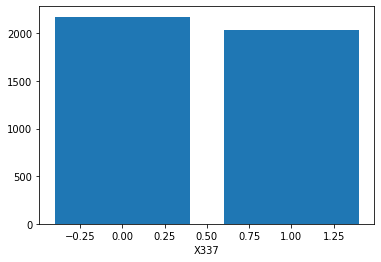

X338
features X338 has value counts:
 0    4180
1      29
Name: X338, dtype: int64
feature with low counts:X338
length of features:2


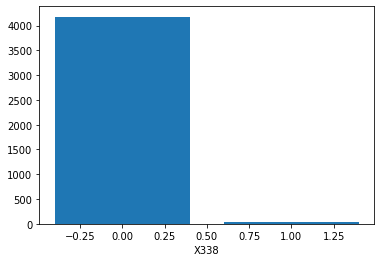

X339
features X339 has value counts:
 0    4208
1       1
Name: X339, dtype: int64
feature with low counts:X339
length of features:2


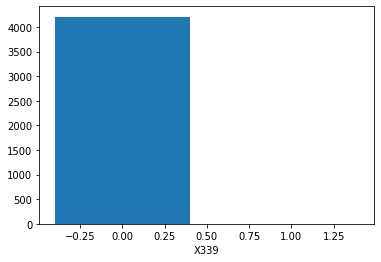

X340
features X340 has value counts:
 0    4115
1      94
Name: X340, dtype: int64
feature with low counts:X340
length of features:2


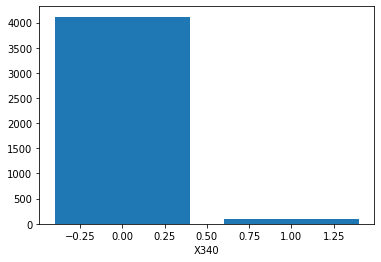

X341
features X341 has value counts:
 0    4175
1      34
Name: X341, dtype: int64
feature with low counts:X341
length of features:2


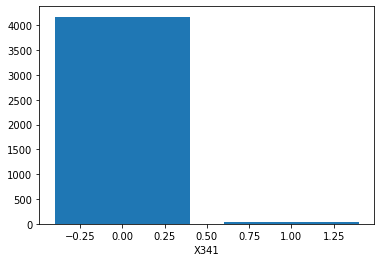

X342
features X342 has value counts:
 0    4115
1      94
Name: X342, dtype: int64
feature with low counts:X342
length of features:2


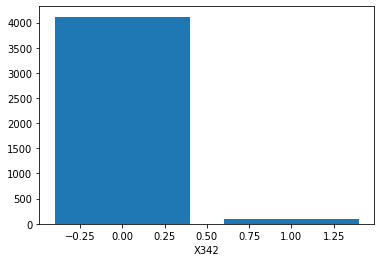

X343
features X343 has value counts:
 0    3879
1     330
Name: X343, dtype: int64
feature with low counts:X343
length of features:2


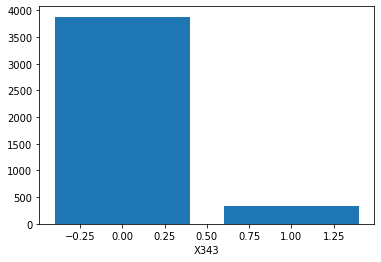

X344
features X344 has value counts:
 0    4173
1      36
Name: X344, dtype: int64
feature with low counts:X344
length of features:2


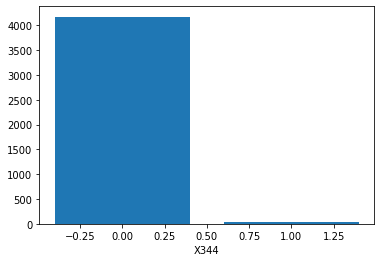

X345
features X345 has value counts:
 0    4115
1      94
Name: X345, dtype: int64
feature with low counts:X345
length of features:2


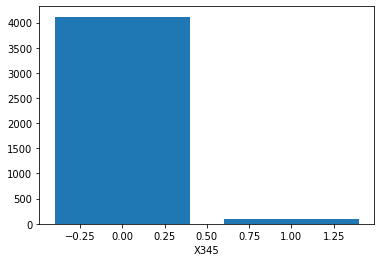

X346
features X346 has value counts:
 0    4009
1     200
Name: X346, dtype: int64
feature with low counts:X346
length of features:2


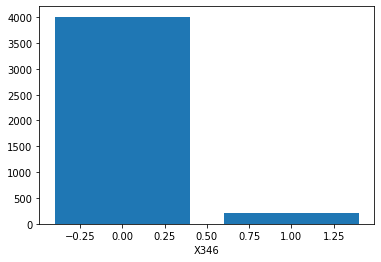

X347
features X347 has value counts:
 0    4209
Name: X347, dtype: int64
feature with low counts:X347
length of features:1


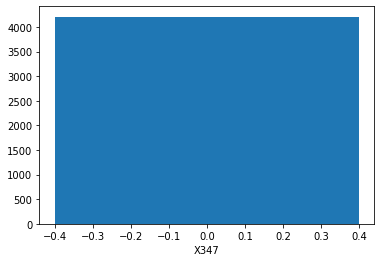

X348
features X348 has value counts:
 1    3987
0     222
Name: X348, dtype: int64
feature with low counts:X348
length of features:2


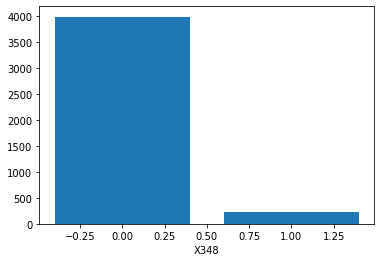

X349
features X349 has value counts:
 0    4020
1     189
Name: X349, dtype: int64
feature with low counts:X349
length of features:2


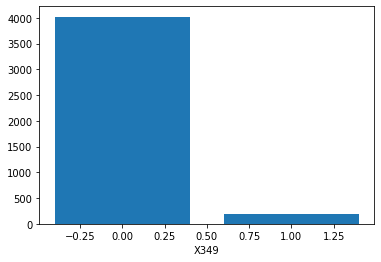

X350
features X350 has value counts:
 0    2783
1    1426
Name: X350, dtype: int64
feature with low counts:X350
length of features:2


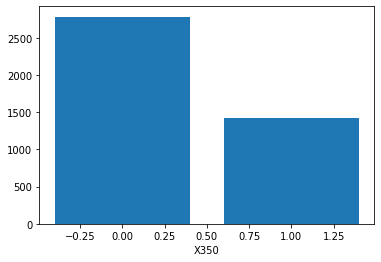

X351
features X351 has value counts:
 0    2958
1    1251
Name: X351, dtype: int64
feature with low counts:X351
length of features:2


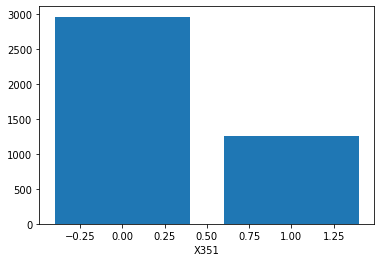

X352
features X352 has value counts:
 0    3981
1     228
Name: X352, dtype: int64
feature with low counts:X352
length of features:2


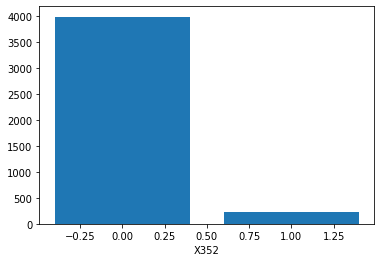

X353
features X353 has value counts:
 0    4200
1       9
Name: X353, dtype: int64
feature with low counts:X353
length of features:2


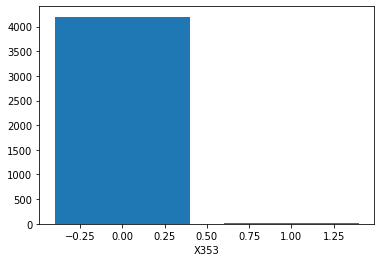

X354
features X354 has value counts:
 0    3355
1     854
Name: X354, dtype: int64
feature with low counts:X354
length of features:2


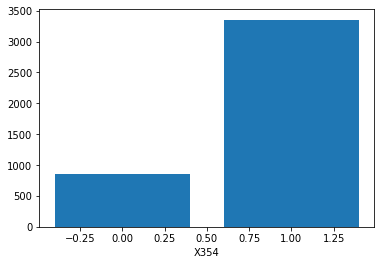

X355
features X355 has value counts:
 0    2608
1    1601
Name: X355, dtype: int64
feature with low counts:X355
length of features:2


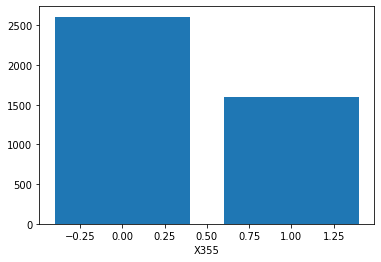

X356
features X356 has value counts:
 0    3452
1     757
Name: X356, dtype: int64
feature with low counts:X356
length of features:2


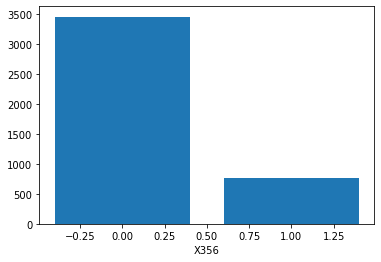

X357
features X357 has value counts:
 0    4204
1       5
Name: X357, dtype: int64
feature with low counts:X357
length of features:2


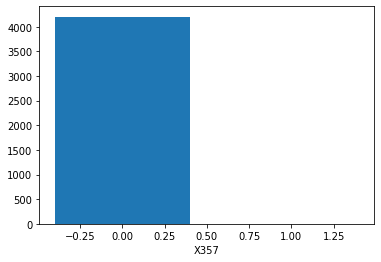

X358
features X358 has value counts:
 0    2412
1    1797
Name: X358, dtype: int64
feature with low counts:X358
length of features:2


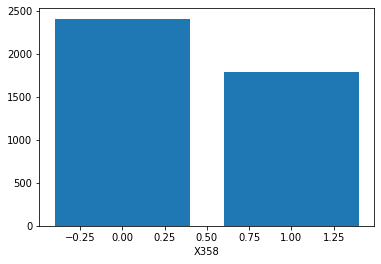

X359
features X359 has value counts:
 0    4075
1     134
Name: X359, dtype: int64
feature with low counts:X359
length of features:2


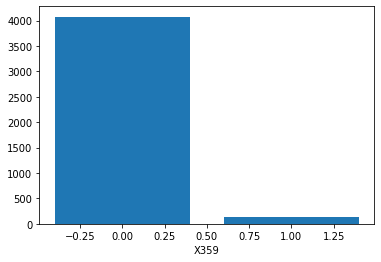

X360
features X360 has value counts:
 0    3887
1     322
Name: X360, dtype: int64
feature with low counts:X360
length of features:2


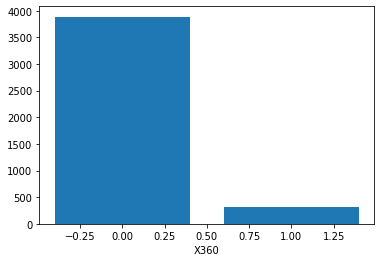

X361
features X361 has value counts:
 1    4066
0     143
Name: X361, dtype: int64
feature with low counts:X361
length of features:2


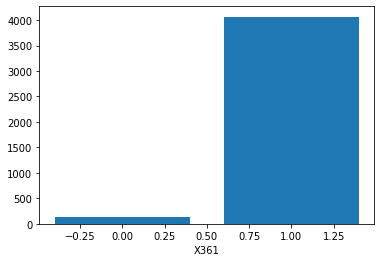

X362
features X362 has value counts:
 1    2190
0    2019
Name: X362, dtype: int64
feature with low counts:X362
length of features:2


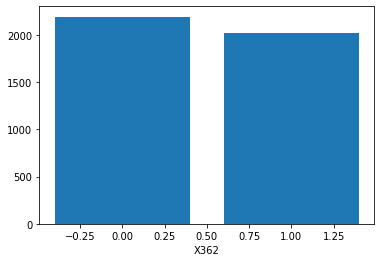

X363
features X363 has value counts:
 1    3173
0    1036
Name: X363, dtype: int64
feature with low counts:X363
length of features:2


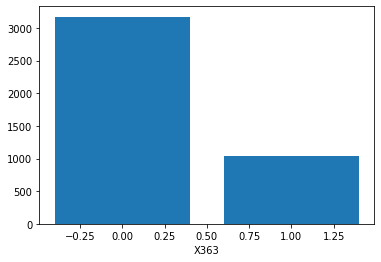

X364
features X364 has value counts:
 0    4197
1      12
Name: X364, dtype: int64
feature with low counts:X364
length of features:2


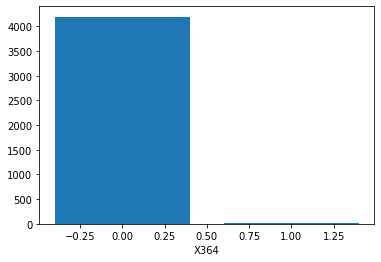

X365
features X365 has value counts:
 0    4197
1      12
Name: X365, dtype: int64
feature with low counts:X365
length of features:2


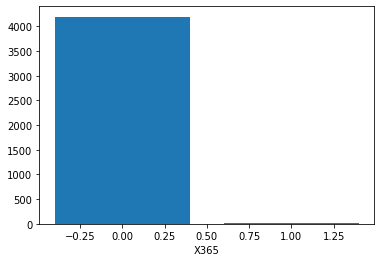

X366
features X366 has value counts:
 0    4204
1       5
Name: X366, dtype: int64
feature with low counts:X366
length of features:2


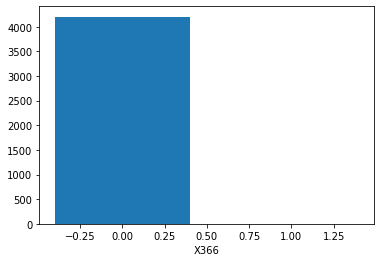

X367
features X367 has value counts:
 0    3991
1     218
Name: X367, dtype: int64
feature with low counts:X367
length of features:2


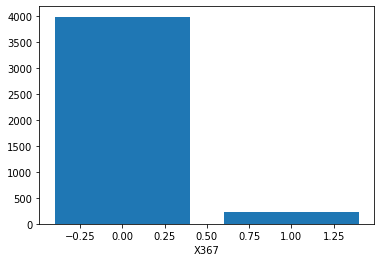

X368
features X368 has value counts:
 0    3945
1     264
Name: X368, dtype: int64
feature with low counts:X368
length of features:2


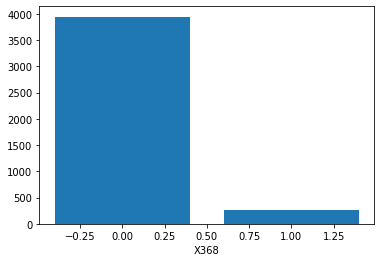

X369
features X369 has value counts:
 0    4207
1       2
Name: X369, dtype: int64
feature with low counts:X369
length of features:2


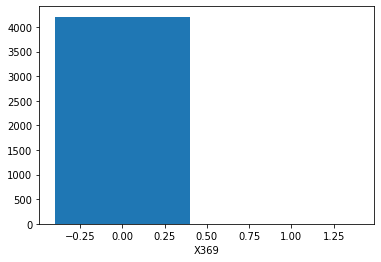

X370
features X370 has value counts:
 0    4181
1      28
Name: X370, dtype: int64
feature with low counts:X370
length of features:2


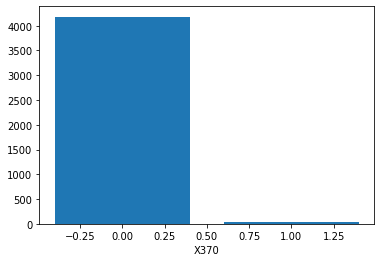

X371
features X371 has value counts:
 0    4149
1      60
Name: X371, dtype: int64
feature with low counts:X371
length of features:2


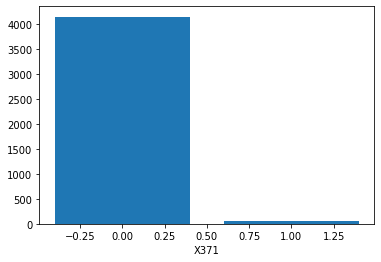

X372
features X372 has value counts:
 0    4207
1       2
Name: X372, dtype: int64
feature with low counts:X372
length of features:2


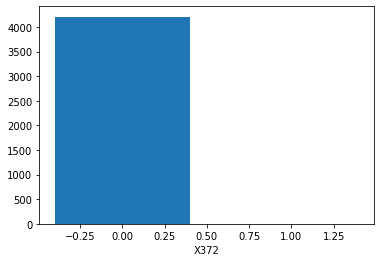

X373
features X373 has value counts:
 0    4128
1      81
Name: X373, dtype: int64
feature with low counts:X373
length of features:2


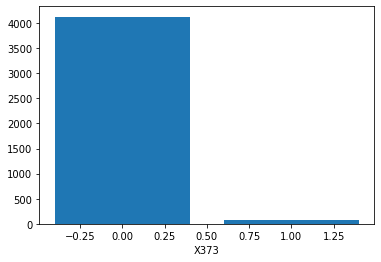

X374
features X374 has value counts:
 0    3252
1     957
Name: X374, dtype: int64
feature with low counts:X374
length of features:2


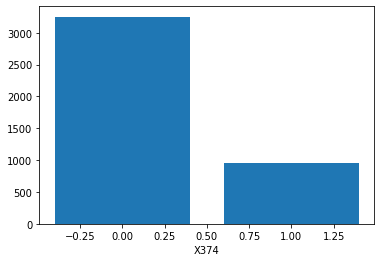

X375
features X375 has value counts:
 0    2867
1    1342
Name: X375, dtype: int64
feature with low counts:X375
length of features:2


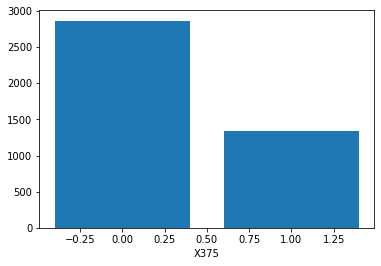

X376
features X376 has value counts:
 0    3968
1     241
Name: X376, dtype: int64
feature with low counts:X376
length of features:2


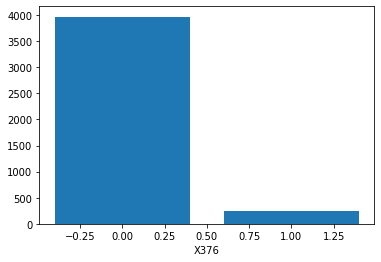

X377
features X377 has value counts:
 0    2884
1    1325
Name: X377, dtype: int64
feature with low counts:X377
length of features:2


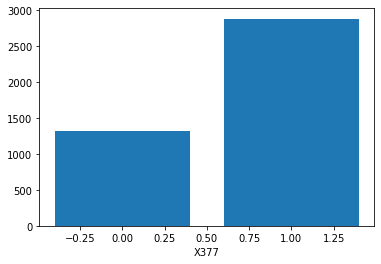

X378
features X378 has value counts:
 0    4122
1      87
Name: X378, dtype: int64
feature with low counts:X378
length of features:2


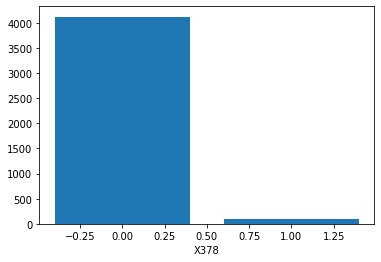

X379
features X379 has value counts:
 0    4169
1      40
Name: X379, dtype: int64
feature with low counts:X379
length of features:2


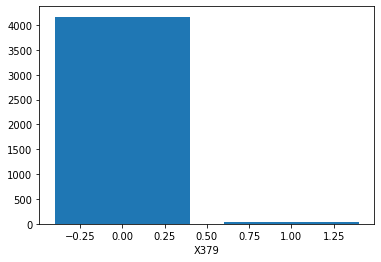

X380
features X380 has value counts:
 0    4175
1      34
Name: X380, dtype: int64
feature with low counts:X380
length of features:2


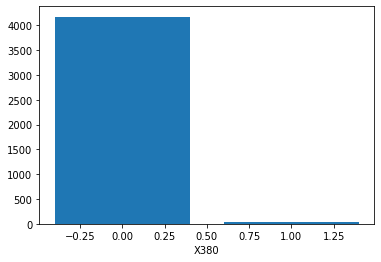

X382
features X382 has value counts:
 0    4177
1      32
Name: X382, dtype: int64
feature with low counts:X382
length of features:2


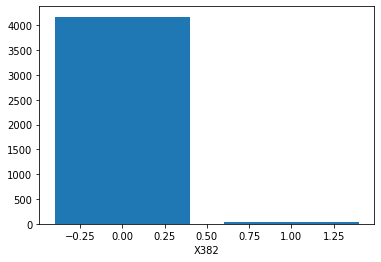

X383
features X383 has value counts:
 0    4202
1       7
Name: X383, dtype: int64
feature with low counts:X383
length of features:2


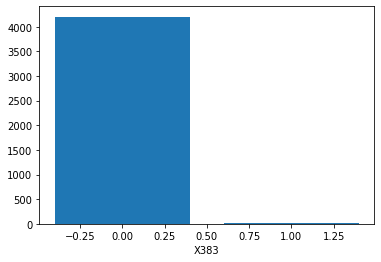

X384
features X384 has value counts:
 0    4207
1       2
Name: X384, dtype: int64
feature with low counts:X384
length of features:2


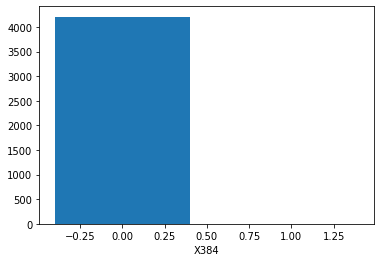

X385
features X385 has value counts:
 0    4203
1       6
Name: X385, dtype: int64
feature with low counts:X385
length of features:2


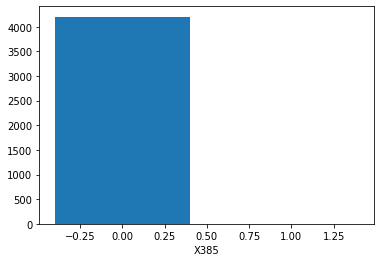

In [192]:
numVCplot(plt.bar, train,train.columns)

In [193]:
def catVCplot(plot, df, features):
    for features in features:
        if df[features].dtypes=='O':
            print(features)
            vc=df[features].value_counts()
            print(f'feature {features} has value counts: {vc}')
            x=df[features].unique()
            h=df[features].value_counts()
            plot(x,h)
            plt.xlabel(features)
            plt.show()
            

X0
feature X0 has value counts: z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
aw     16
l      16
ad     14
b      11
k      11
au     11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ab      1
ac      1
g       1
Name: X0, dtype: int64


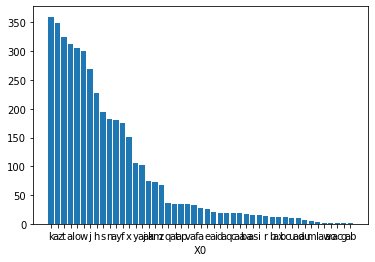

X1
feature X1 has value counts: aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64


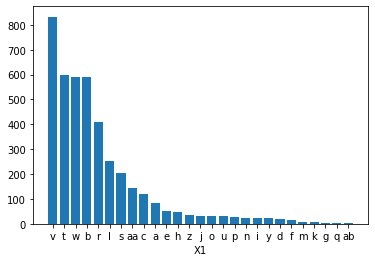

X2
feature X2 has value counts: as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
at       6
h        6
al       5
q        5
an       5
av       4
ah       4
p        4
au       3
j        1
af       1
am       1
o        1
aa       1
l        1
c        1
ar       1
Name: X2, dtype: int64


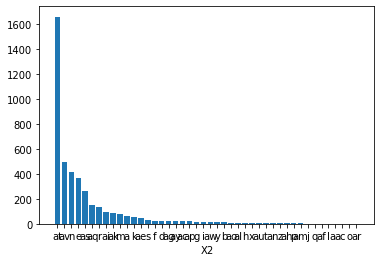

X3
feature X3 has value counts: c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64


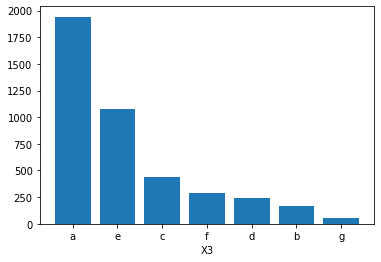

X4
feature X4 has value counts: d    4205
a       2
b       1
c       1
Name: X4, dtype: int64


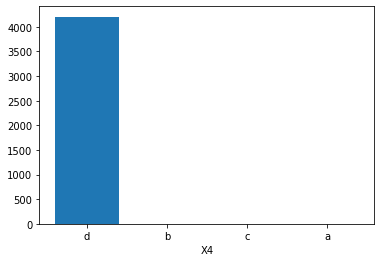

X5
feature X5 has value counts: w     231
v     231
q     220
r     215
d     214
s     214
n     212
m     208
p     208
i     207
ae    205
ag    204
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
h       1
y       1
g       1
u       1
Name: X5, dtype: int64


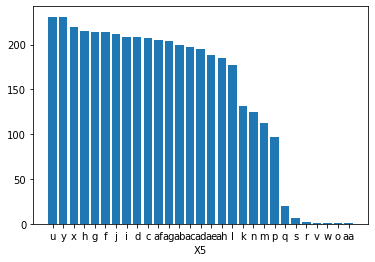

X6
feature X6 has value counts: g    1042
j    1039
d     625
i     488
l     478
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64


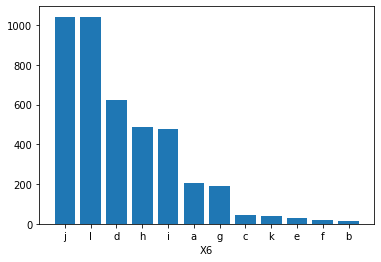

X8
feature X8 has value counts: j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    163
m    155
g    130
u    119
t    119
q    117
h    117
y    116
x    105
d    103
l    101
p    100
c    100
Name: X8, dtype: int64


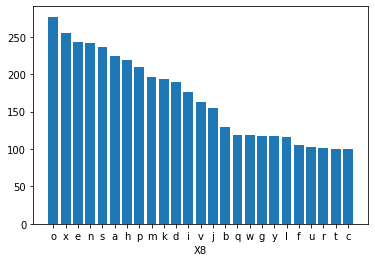

In [194]:
catVCplot(plt.bar, train, train.columns)

In [195]:
def encoding(df, features):
    for features in features:
        if df[features].dtypes=='O':
            df[features]=preprocessing.LabelEncoder().fit_transform(df[features])

In [196]:
encoding(train, train.columns)

In [197]:
encoding(test, test.columns)

In [198]:
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [199]:
def transformation(df, features):
    df[features]=preprocessing.StandardScaler().fit_transform(df[features])

In [200]:
X=train.drop(['ID', 'y'], axis=1)
x=test[X.columns]
y=train.y

In [201]:
transformation(X, X.columns)

In [202]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
X0,4209.0,5.011698e-18,1.000119,-2.166513,-0.783357,0.381405,0.963786,1.182179
X1,4209.0,-1.237151e-15,1.000119,-1.302882,-0.951182,0.221153,1.041787,1.745188
X2,4209.0,-5.151498e-16,1.000119,-1.587952,-0.853914,-0.119876,0.705916,2.357502
X3,4209.0,-2.304590e-16,1.000119,-1.678270,-0.528650,-0.528650,1.195779,1.770589
X4,4209.0,5.653970e-16,1.000119,-40.571299,0.028938,0.028938,0.028938,0.028938
...,...,...,...,...,...,...,...,...
X380,4209.0,2.597510e-17,1.000119,-0.090243,-0.090243,-0.090243,-0.090243,11.081251
X382,4209.0,8.829557e-16,1.000119,-0.087527,-0.087527,-0.087527,-0.087527,11.425027
X383,4209.0,2.532095e-16,1.000119,-0.040815,-0.040815,-0.040815,-0.040815,24.500729
X384,4209.0,3.698633e-16,1.000119,-0.021804,-0.021804,-0.021804,-0.021804,45.863929


In [203]:
def train_val_split(X, y):
    global X_train, X_val, y_train, y_val
    X_train, X_val, y_train, y_val=model_selection.train_test_split(X,y, test_size=0.2, random_state=0)
    print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

In [204]:
train_val_split(X,y)

(3367, 376) (842, 376) (3367,) (842,)


In [205]:
def modelPredict(model, X_train, y_train):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    print(model.score(X_val, y_val))
    print(f'Mean Absolute Error train: {metrics.mean_absolute_error(y_train, model.predict(X_train))}')
    print(f'Mean Absolute Error val: {metrics.mean_absolute_error(y_val, model.predict(X_val))}')
    print(f'Max Error train: {metrics.max_error(y_train, model.predict(X_train))}')   
    print(f'Mean Squared Error val: {metrics.mean_squared_error(y_val, model.predict(X_val))}')
    #print(f'Mean Squared log Error val: {metrics.mean_squared_log_error(y_val, model.predict(X_val))}')
    print(f'Median Absolute Error val: {metrics.median_absolute_error(y_val, model.predict(X_val))}')
    print(f'r2 score val: {metrics.r2_score(y_val, model.predict(X_val))}')

In [206]:
modelPredict(linear_model.LinearRegression(), X_train, y_train)

0.6249679878763623
-1.8868903614774578e+21
Mean Absolute Error train: 5.109966063945556
Mean Absolute Error val: 35672971389.34959
Max Error train: 72.52532787322997
Mean Squared Error val: 3.4972384612380935e+23
Median Absolute Error val: 4.232208671569822
r2 score val: -1.8868903614774578e+21


In [207]:
modelPredict(linear_model.Ridge(), X_train, y_train)

0.6248483594578251
0.43790867466516714
Mean Absolute Error train: 5.113073206498985
Mean Absolute Error val: 5.806694237857375
Max Error train: 72.56237296485214
Mean Squared Error val: 104.18026621059488
Median Absolute Error val: 4.2130539324204435
r2 score val: 0.43790867466516714


In [208]:
modelPredict(linear_model.Ridge(alpha=0.1), X_train, y_train)

0.6249621687470104
0.436672498580856
Mean Absolute Error train: 5.110493506866854
Mean Absolute Error val: 5.816534847590432
Max Error train: 72.53525285714049
Mean Squared Error val: 104.40938405629367
Median Absolute Error val: 4.216327523201059
r2 score val: 0.436672498580856


In [209]:
modelPredict(linear_model.Lasso(), X_train, y_train)

0.5494565330642602
0.4334652253632125
Mean Absolute Error train: 5.723010227519149
Mean Absolute Error val: 5.915159378382517
Max Error train: 71.31664782057027
Mean Squared Error val: 105.00383296977793
Median Absolute Error val: 4.346440147421191
r2 score val: 0.4334652253632125


In [210]:
modelPredict(linear_model.Lasso(alpha=0.1), X_train, y_train)

0.6081295554283017
0.45557253096742245
Mean Absolute Error train: 5.208953606450567
Mean Absolute Error val: 5.589717470879865
Max Error train: 72.99004788640903
Mean Squared Error val: 100.90637606333375
Median Absolute Error val: 4.158475138713975
r2 score val: 0.45557253096742245


In [211]:
modelPredict(linear_model.Lasso(alpha=0.001), X_train, y_train)

0.6245891224219949
0.43433319528183945
Mean Absolute Error train: 5.1143347087206
Mean Absolute Error val: 5.829650720580759
Max Error train: 72.56564520102656
Mean Squared Error val: 104.84295993525551
Median Absolute Error val: 4.224926612343715
r2 score val: 0.43433319528183945


In [212]:
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [213]:
def vifFactor(df):
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [214]:
vifFactor(tslice)

   vif factor features
0    4.331014       X0
1    2.470318       X1
2    3.147870       X2
3    3.249969       X5
4    5.078440       X6
5    3.343352       X8


In [216]:
X=X.drop(['X4'], axis=1)

In [217]:
X

,X0,X1,X2,X3,X5,X6,X8,X10,X11,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.163012,1.393488,-0.028122,-1.678270,1.292117,0.751787,0.339445,-0.116122,0.0,-0.284906,...,-0.684167,-0.246447,1.475332,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
1,0.163012,1.159021,0.155388,0.620969,1.776974,1.437511,0.339445,-0.116122,0.0,-0.284906,...,1.461630,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
2,-0.710560,1.510721,1.531709,-0.528650,1.655760,0.751787,1.618389,-0.116122,0.0,-0.284906,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,11.425027,-0.040815,-0.021804,-0.037783
3,-0.710560,1.159021,1.531709,1.195779,1.655760,1.437511,-1.081605,-0.116122,0.0,-0.284906,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
4,-0.710560,1.393488,1.531709,1.195779,-0.162454,-1.305384,0.197340,-0.116122,0.0,-0.284906,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-1.584132,1.041787,-0.119876,-0.528650,-1.617026,-1.305384,0.623655,-0.116122,0.0,-0.284906,...,1.461630,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
4205,0.090214,0.572854,2.082237,0.046160,-1.617026,0.066063,-0.655290,-0.116122,0.0,-0.284906,...,-0.684167,4.057675,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
4206,-1.584132,1.393488,1.898728,-1.678270,-1.617026,-0.276798,-1.081605,-0.116122,0.0,3.509932,...,-0.684167,-0.246447,1.475332,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
4207,-1.511334,0.924554,0.705916,1.195779,-1.617026,1.437511,1.192075,-0.116122,0.0,-0.284906,...,-0.684167,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783


In [218]:
train_val_split(X,y)

(3367, 375) (842, 375) (3367,) (842,)


In [219]:
modelPredict(linear_model.LinearRegression(), X_train, y_train)

0.6249458211180212
-5.581439180775537e+21
Mean Absolute Error train: 5.11036867886649
Mean Absolute Error val: 60461995592.86295
Max Error train: 72.49916095733641
Mean Squared Error val: 1.034486378783839e+24
Median Absolute Error val: 4.2206577682495094
r2 score val: -5.581439180775537e+21


In [220]:
modelPredict(linear_model.Ridge(), X_train, y_train)

0.6248440006689711
0.4379387198665051
Mean Absolute Error train: 5.11283336237904
Mean Absolute Error val: 5.807134609657883
Max Error train: 72.55888446201047
Mean Squared Error val: 104.17469751217763
Median Absolute Error val: 4.209182006583525
r2 score val: 0.4379387198665051


In [221]:
modelPredict(linear_model.Lasso(), X_train, y_train)

0.5494565330642602
0.4334652253632125
Mean Absolute Error train: 5.723010227519149
Mean Absolute Error val: 5.915159378382517
Max Error train: 71.31664782057027
Mean Squared Error val: 105.00383296977793
Median Absolute Error val: 4.346440147421191
r2 score val: 0.4334652253632125
